# Telecom Churn Prediction

#### Business Problem Overview
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Index

1. Environment Setup
2. Reading the Input data (csv) file
3. Data Analysis & Cleaning & Derivation
4. Data Visualization
5. Data Preparation
    1. Train Test Split
    2. Scaling - RobustScaler
    3. Fixing Imbalance - SMOTE    
6. Data Modelling
    1. PCA + Logistic Regression + Hyperparameter Tuning
    2. Decision Tree Classification
    3. Random Forest Classifier + Hyperparameter Tuning
    4. XGBoost
7. Feature Selection
    1. RFE + Logistic Regression + Hyperparameter Tuning
8. Summary

## 1. Environment Setup

In [1]:
# To get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing data prep and EDA, plotting Libraries

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Importing Machine learning Scikit-learn Libraries

#Feature Scaling, hyper parameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

# from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

## Evaluation Metrics
from sklearn.metrics import classification_report,  auc, roc_auc_score, roc_curve, precision_recall_curve,make_scorer
from sklearn.metrics import precision_score,recall_score, accuracy_score, confusion_matrix, f1_score,r2_score

#building models
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn import set_config
set_config(print_changed_only=True)

#imbalance data balance
from imblearn.metrics import sensitivity_specificity_support

In [5]:
# Set the required global options

# To display all the columns in dataframe
pd.set_option( "display.max_columns", None)
pd.set_option( "display.max_rows", None)

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

## 2. Reading the Input data (csv) file

In [7]:
tel = pd.read_csv('./telecom_churn_data.csv')

# G Colab
# tel = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/telecom_churn_data.csv')

In [8]:
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## 3. Data Analysis & Cleaning

In [9]:
# Checking rows and columns - shape 
tel.shape

(99999, 226)

In [10]:
# Getting the overview of Data types and Non-Null info
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
#Rename vbc columns to corresponding monthnumber to keep it consistent
tel.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [12]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in tel.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == tel.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [13]:
# drop id and date columns
# id columns - as they are moble number - unique for every user, circle_id = 109 corresponds to single circle
# Date columns - does not much information to the analysis
print("Shape before dropping: ", tel.shape)
tel = tel.drop(id_cols, axis=1)
print("Shape after dropping: ", tel.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 224)


#### Impute Categorical values

In [14]:
# Replace NaN values in categorical variables
# We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

# replace missing values with '-1' in categorical columns
tel[cat_cols] = tel[cat_cols].apply(lambda x: x.fillna(-1))

#### Imputation of Numerical variables

In [15]:
tel[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].tail(20)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
99979,NaN,NaN,NaN
99980,1.0,0.0,1.0
99981,0.0,1.0,1.0
99982,1.0,0.0,1.0
99983,NaN,NaN,NaN
99984,1.0,0.0,1.0
99985,NaN,NaN,NaN
99986,1.0,0.0,1.0
99987,1.0,0.0,1.0
99988,NaN,NaN,NaN


##### But, digging deep into the columns, there is a kind of relation among these variables.
- total_rech_data - total number of recharges done in a month (= count_rech_2g+count_rech_3g). So, count_rech_2g, count_rech_3g columns can be removed

In [16]:
cols_todel = ['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9']
tel = tel.drop(cols_todel,axis=1,errors='ignore')

In [17]:
num_cols = [column for column in tel.columns if column not in date_cols + cat_cols]

In [18]:
#recharge_cols = [col for col in num_cols if (('rech' in col) & ('rech_num' not in col))]
recharge_cols = [col for col in num_cols if (('rech' in col))]

In [19]:
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [20]:
# some recharge columns have minimum value of 1 while some don't
tel[recharge_cols].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [21]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
tel.loc[tel.total_rech_data_6.isnull() & tel.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [22]:
# Date columns - does not much information to the analysis
print("Shape before dropping: ", tel.shape)
tel = tel.drop(date_cols, axis=1)
print("Shape after dropping: ", tel.shape)

Shape before dropping:  (99999, 216)
Shape after dropping:  (99999, 204)


In [23]:
# Checking for any Null columns
tel.isnull().sum().any()

tel.shape[0]

# Finding the columns with more than 40% NULLs.
ser = tel.isnull().sum()/len(tel)*100
nulls = ser[ser > 40]
nulls

True

99999

total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
arpu_3g_6             74.846748
arpu_3g_7             74.428744
arpu_3g_8             73.660737
arpu_3g_9             74.077741
arpu_2g_6             74.846748
arpu_2g_7             74.428744
arpu_2g_8             73.660737
arpu_2g_9             74.077741
dtype: float64

In [24]:
# Checking the info of the remaining columns with NULLs
tel[nulls.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_6   25153 non-null  float64
 1   total_rech_data_7   25571 non-null  float64
 2   total_rech_data_8   26339 non-null  float64
 3   total_rech_data_9   25922 non-null  float64
 4   max_rech_data_6     25153 non-null  float64
 5   max_rech_data_7     25571 non-null  float64
 6   max_rech_data_8     26339 non-null  float64
 7   max_rech_data_9     25922 non-null  float64
 8   av_rech_amt_data_6  25153 non-null  float64
 9   av_rech_amt_data_7  25571 non-null  float64
 10  av_rech_amt_data_8  26339 non-null  float64
 11  av_rech_amt_data_9  25922 non-null  float64
 12  arpu_3g_6           25153 non-null  float64
 13  arpu_3g_7           25571 non-null  float64
 14  arpu_3g_8           26339 non-null  float64
 15  arpu_3g_9           25922 non-null  float64
 16  arpu

In [25]:
# Checking the data of the columns with NULLs
tel[nulls.index[:]].sample(4)

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
26271,NaN,1.0,1.0,2.0,NaN,154.0,252.0,23.0,NaN,154.0,252.0,46.0,NaN,0.00,212.17,0.00,NaN,0.42,212.57,0.00
78182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58565,NaN,NaN,NaN,1.0,NaN,NaN,NaN,23.0,NaN,NaN,NaN,23.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
79392,8.0,1.0,9.0,3.0,154.0,154.0,154.0,252.0,312.0,154.0,354.0,452.0,7.13,0.11,0.02,217.83,12.0,0.00,0.00,211.58


In [26]:
#nulls.index

# creating a list of NULL columns of type float
nullsf = nulls.index[:]
nullsf

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9'],
      dtype='object')

In [27]:
# let's impute the columns av_rech_amt_data_* , total_rech_data_* for furthur usage

tel[nullsf]=tel[nullsf].fillna(0)

In [28]:
# Verifying, whether floating variables are successfully imputed

ser = tel.isnull().sum()/len(tel)*100
nulls = ser[ser > 40]
nulls

Series([], dtype: float64)

- All the columns with more than 70% missing values are imputed with zero.

In [29]:
# Checking for any Null columns
tel.isnull().sum().any()

# Finding the columns with more than 40% NULLs.
ser = tel.isnull().sum()/len(tel)*100
nullsgtzero = ser[ser > 0]
nullsgtzero

True

loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
onnet_mou_6         3.937039
onnet_mou_7         3.859039
onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_6        3.937039
offnet_mou_7        3.859039
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_6       3.937039
roam_ic_mou_7       3.859039
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_6       3.937039
roam_og_mou_7       3.859039
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_6    3.937039
loc_og_t2t_mou_7    3.859039
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_6    3.937039
loc_og_t2m_mou_7    3.859039
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_6    3.937039
loc_og_t2f_mou_7    3.859039
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_6    3.937039
loc_og_t2c_mou_7    3.859039
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou

- All the missing values are for columns corresponding to incoming/outgoing calls within or outside network. This might be the customer has not utilised and can be imputed with 0.
- And dropping date_of_last_rech_6,_7,_8 as they are dates and cannot be imputed.

In [30]:
# Imputing the rest of the columns with 0

cols = tel[nullsgtzero.index].select_dtypes(exclude = 'object').columns
tel[cols] = tel[cols].fillna(0)

In [31]:
# Finding the columns with NULLs.

ser = tel.isnull().sum()/len(tel)*100
nulls = ser[ser > 0]
nulls.sort_values(ascending=False)

Series([], dtype: float64)

In [32]:
# Shape of Dataframe After dropping 
tel.shape

(99999, 204)

In [33]:
# Checking for any Null columns
tel.isnull().sum().any()

False

### Revenue is mostly generated by high value customers with 70th percentile of the total amount spent in the good phase

In [34]:
## Derive the total data recharge amount columns for months 6,7,8,9

# mon_list = ['_6','_7'.'_8','_9']

for i in range(6,10):
    count = 'total_rech_data_' + str(i)
    avg_amt = 'av_rech_amt_data_' + str(i)
    tot_amt = 'total_rech_amnt_data_' + str(i)
    
    tel[tot_amt] = tel[avg_amt] * tel[count]


In [35]:
# Verifying the newly derived features
tel.iloc[:,-4:].head()

,total_rech_amnt_data_6,total_rech_amnt_data_7,total_rech_amnt_data_8,total_rech_amnt_data_9
0,252.0,252.0,252.0,0.0
1,0.0,154.0,100.0,0.0
2,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,0.0
4,56.0,0.0,0.0,0.0


In [36]:
# Lets compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amnt_months_6_7 = tel[['total_rech_amnt_data_6','total_rech_amnt_data_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis=1)
# type(avg_recharge_amnt_months_6_7)

amount_70th_percentile = np.percentile(avg_recharge_amnt_months_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  239.0


In [37]:
tel.shape
df_highvalue_cust = tel[avg_recharge_amnt_months_6_7 >= amount_70th_percentile]
df_highvalue_cust.shape

(99999, 208)

(30001, 208)

#### Now to tag churned customers (churn=1, else 0) based on the churn month as follows: Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. The attributes i am using to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

###### We will create a temporary dataset that stores all the parameters/features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [38]:
churn_parameters_data = df_highvalue_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [39]:
churn_parameters_data.isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

##### Check if the customer has used any mobile calls or data in the fourth month.
- If not used any services: Churn(1)
- else: non-Churn(0)

In [40]:
df_highvalue_cust['Churn'] = df_highvalue_cust.apply(lambda x:1 if ((x.total_ic_mou_9 == 0)&
                                                                    (x.total_og_mou_9 == 0)&
                                                                   (x.vol_2g_mb_9 == 0)&
                                                                   (x.vol_3g_mb_9 == 0)) else 0,axis=1)

#### Now, that churners are tagged from churn phase. We can remove all the columns corresponding to 9th month

In [41]:
cols_9_todel = [col for col in df_highvalue_cust.columns if col.endswith('_9')]
print('Total cols ending with _9 : ', len(cols_9_todel))
cols_9_todel

Total cols ending with _9 :  51


['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_rech_amnt_data_9']

In [42]:
# Dropping the columns related to churn month, here the 9th month
df_highvalue_cust.drop(columns = cols_9_todel, inplace = True, errors = 'ignore')

In [43]:
# Checking whether the columns are dropped successfully

cols_9_todel = [col for col in df_highvalue_cust.columns if col.endswith('_9')]
print('Total cols ending with _9 : ', len(cols_9_todel))

df_highvalue_cust.shape

Total cols ending with _9 :  0


(30001, 158)

### Checking Variance of the features

- Dropping featurs with  0 & 1 variance.

In [44]:
# Creating a list of columns having entirely unique or entirely constant values

col_list = []
for i in df_highvalue_cust.columns:
    if df_highvalue_cust[i].nunique() in (1, len(df_highvalue_cust)):
        i, df_highvalue_cust[i].nunique()
        col_list.append(i)
print('Column number with zero variance : ',len(col_list))

('loc_og_t2o_mou', 1)

('std_og_t2o_mou', 1)

('loc_ic_t2o_mou', 1)

('std_og_t2c_mou_6', 1)

('std_og_t2c_mou_7', 1)

('std_og_t2c_mou_8', 1)

('std_ic_t2o_mou_6', 1)

('std_ic_t2o_mou_7', 1)

('std_ic_t2o_mou_8', 1)

Column number with zero variance :  9


In [45]:
df_highvalue_cust[col_list].sample(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
32122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- As we can see that All the above columns have either unique or constant values, So i would drop these features.

In [46]:
# Dropping the entirely unique or entirely constant variables
df_highvalue_cust.shape
df_highvalue_cust.drop(columns = col_list, inplace = True, errors='ignore')
df_highvalue_cust.shape

(30001, 158)

(30001, 149)

#### ARPU - Average revenue per user. One of the important parameter to network procider.
- The total revenue generated during the standard time period should then be divided by the number of units or users.ref-https://www.investopedia.com/terms/a/arpu.asp
- ARPU can never be negative as it is Total revenue per total number of subscribers. So, let remove those rows as this might be data entry issue and so this rows cannot be trusted

In [47]:
df_highvalue_cust[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957
std,460.640461,479.776947,501.961981
min,-2258.709000,-2014.045000,-945.808000
25%,309.865000,309.826000,231.473000
50%,481.694000,480.943000,427.585000
75%,699.943000,698.315000,661.491000
max,27731.088000,35145.834000,33543.624000


In [48]:
cols_neg_arpu = df_highvalue_cust.columns[(df_highvalue_cust < 0).any()].tolist()

In [49]:
(df_highvalue_cust[cols_neg_arpu]<0).sum(axis=0)

arpu_6                 39
arpu_7                 50
arpu_8                 90
arpu_3g_6             396
arpu_3g_7             124
arpu_3g_8             161
arpu_2g_6             406
arpu_2g_7             118
arpu_2g_8             156
night_pck_user_6    13245
night_pck_user_7    12944
night_pck_user_8    14048
fb_user_6           13245
fb_user_7           12944
fb_user_8           14048
dtype: int64

In [50]:
for col in cols_neg_arpu[0:3]:
    #print(type(col))
    #print(df_highvalue_cust[col].head())
    df_highvalue_cust = df_highvalue_cust[(df_highvalue_cust[col] >= 0)]

In [51]:
df_highvalue_cust.shape #--(30001, 149)

(29824, 149)

#### Now, let's understand the remaining columns and remove if there are any dependent columns

- There ar emany columns which represents incoming/outgoing calls made the within operator, outside operator & to customer care, which are totally represented by minutes of usage columns.
- ARPU columns corresponding to 3g/2g for every  months are aggregatively represented in arpu_mon* columns.
- average recharge amount is part of new derived column - total recharge amount
- So, dropping this redundant columns.

In [52]:
# Let's drop individual columns whose totals are available as a different attribute

redundant_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

df_highvalue_cust.drop(redundant_cols, axis = 1, inplace = True)

df_highvalue_cust.shape

(29824, 101)

### Deriving new Features

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [53]:
# Deriving columns detail after substracting the action phase i.e 8th columns with the 6th and 7th columns

cols = ['arpu_','onnet_mou_','offnet_mou_','roam_ic_mou_','roam_og_mou_','loc_og_mou_','std_og_mou_','isd_og_mou_','spl_og_mou_','total_og_mou_','loc_ic_mou_','std_ic_mou_','isd_ic_mou_','spl_ic_mou_','total_ic_mou_','total_rech_num_','total_rech_amt_','max_rech_amt_','total_rech_data_','max_rech_data_','vol_2g_mb_','vol_3g_mb_']

for i in cols:
    col1 = i + str('6')
    col2 = i + str('7')
    col3 = i + str('8')
    col4 = i + str('diff_avg')
    
    ## -ve shows the user is not using the services actively as before
    df_highvalue_cust[col4] = df_highvalue_cust[col3] - ((df_highvalue_cust[col1] + df_highvalue_cust[col2])/2)

In [54]:
# Dropping the set of columns as the _diff_avg features are derived from these columns.

# for i in range(6,9):
#     for j in cols:
#         col = j + str(i)
#         df_highvalue_cust.drop(columns = [col], inplace = True)

In [55]:
# Deriving aggregated columns from _6th and _7th months as _goodphase

cols = [ 'og_others_', 'ic_others_','night_pck_user_','monthly_2g_','monthly_3g_','sachet_2g_','sachet_3g_','fb_user_','vbc_3g_','total_rech_amnt_data_']

for i in cols:
    col1 = i + str('6')
    col2 = i + str('7')
    col3 = i + str('goodph')
    col4 = i + str('8')
    col5 = i + str('actionph')
    col6 = i + str('drop')
    
    df_highvalue_cust[col3] = ((df_highvalue_cust[col1] + df_highvalue_cust[col2])/2)
    df_highvalue_cust[col5] = df_highvalue_cust[col4]
    #df_highvalue_cust[col6] = [(df_highvalue_cust[col3] - df_highvalue_cust[col5]) > 0 ] = 1 else 0
    #df_highvalue_cust.loc[((df_highvalue_cust[col3] - df_highvalue_cust[col5]) > 0), col6] = 1
    #df_highvalue_cust.loc[((df_highvalue_cust[col3] - df_highvalue_cust[col5]) < 0), col6] = 0
    df_highvalue_cust[col6] = np.where(((df_highvalue_cust[col3] - df_highvalue_cust[col5]) <= 0),0,1)
    
    df_highvalue_cust.drop(col3,axis=1,inplace=True)
    df_highvalue_cust.drop(col5,axis=1,inplace=True)

In [56]:
# Dropping the set of columns as the _diff_avg features are derived from these columns.

for i in range(6,9):
    for j in cols:
        col = j + str(i)
        df_highvalue_cust.drop(columns = [col], inplace = True)

cols = ['arpu_','total_og_mou_','total_ic_mou_','total_rech_num_','total_rech_amt_','total_rech_data_','total_rech_amnt_data_']
cols = [ 'og_others_', 'ic_others_','night_pck_user_','monthly_2g_','monthly_3g_','sachet_2g_','sachet_3g_','fb_user_','vbc_3g_']

In [57]:
# Deriving usage/revenue drop at subsequent months
# cols = ['arpu_','onnet_mou_','offnet_mou_','roam_ic_mou_','roam_og_mou_','loc_og_mou_','std_og_mou_','isd_og_mou_','spl_og_mou_','total_og_mou_','loc_ic_mou_','std_ic_mou_','isd_ic_mou_','spl_ic_mou_','total_ic_mou_','total_rech_num_','total_rech_amt_','max_rech_amt_','total_rech_data_','max_rech_data_','vol_2g_mb_','vol_3g_mb_']

cols = ['loc_og_t2c_mou_','arpu_','onnet_mou_','offnet_mou_','roam_ic_mou_','roam_og_mou_','loc_og_mou_','std_og_mou_','isd_og_mou_','spl_og_mou_','total_og_mou_','loc_ic_mou_','std_ic_mou_','isd_ic_mou_','spl_ic_mou_','total_ic_mou_','total_rech_num_','total_rech_amt_','total_rech_data_','vol_2g_mb_','vol_3g_mb_']

for i in cols:
    col1 = i + str('6')
    col2 = i + str('7')
    col3 = i + str('8')
    col4 = i + str('drop_1')
    col5 = i + str('drop_2')
    col6 = i + str('drop_ovrall')
    
    ## -ve shows the user is not using the services actively as before
    df_highvalue_cust[col4] = df_highvalue_cust[col1] - df_highvalue_cust[col2]
    df_highvalue_cust[col5] = df_highvalue_cust[col2] - df_highvalue_cust[col3]
    df_highvalue_cust.loc[(df_highvalue_cust[col4] > 0) & (df_highvalue_cust[col5] > 0), col6] = 1
    df_highvalue_cust.loc[~(df_highvalue_cust[col4] > 0) | ~(df_highvalue_cust[col5] > 0), col6] = 0
    df_highvalue_cust.drop(col4,axis=1,inplace=True)
    df_highvalue_cust.drop(col5,axis=1,inplace=True)
#     df_highvalue_cust[col6] = df_highvalue_cust.loc[(df_highvalue_cust[col4] > 0) & (df_highvalue_cust[col5] > 0)]


#df_highvalue_cust.drop(columns = [col4 ])

In [58]:
# Dropping the set of columns as the _diff_avg features are derived from these columns.

cols = ['loc_og_t2c_mou_','arpu_','onnet_mou_','offnet_mou_','roam_ic_mou_','roam_og_mou_','loc_og_mou_','std_og_mou_','isd_og_mou_','spl_og_mou_','total_og_mou_','loc_ic_mou_','std_ic_mou_','isd_ic_mou_','spl_ic_mou_','total_ic_mou_','total_rech_num_','total_rech_amt_','max_rech_amt_','total_rech_data_','max_rech_data_','vol_2g_mb_','vol_3g_mb_']

for i in range(6,9):
    for j in cols:
        col = j + str(i)
        df_highvalue_cust.drop(columns = [col], inplace = True)

In [59]:
df_highvalue_cust.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 99997
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   aon                          29824 non-null  int64  
 1   Churn                        29824 non-null  int64  
 2   arpu_diff_avg                29824 non-null  float64
 3   onnet_mou_diff_avg           29824 non-null  float64
 4   offnet_mou_diff_avg          29824 non-null  float64
 5   roam_ic_mou_diff_avg         29824 non-null  float64
 6   roam_og_mou_diff_avg         29824 non-null  float64
 7   loc_og_mou_diff_avg          29824 non-null  float64
 8   std_og_mou_diff_avg          29824 non-null  float64
 9   isd_og_mou_diff_avg          29824 non-null  float64
 10  spl_og_mou_diff_avg          29824 non-null  float64
 11  total_og_mou_diff_avg        29824 non-null  float64
 12  loc_ic_mou_diff_avg          29824 non-null  float64
 13  std_ic_mou_diff_

In [60]:
df_highvalue_cust.shape

(29824, 55)

## 4. Data Visualization

In [61]:
## Show labels in bar plots

def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [62]:
def default_rate_per_var(var, df = df_highvalue_cust, sort_flg=True, head=0):
    
    plt.subplot(1, 2, 1)
    if head == 0:
        ser = (df[var].value_counts(normalize=True)*100)
    else:
        ser = (df[var].value_counts(normalize=True).head(head)*100)
    #ser
    if sort_flg:
        ser = ser.sort_index()
    ax = ser.plot.bar(color=sns.color_palette("Paired", 10))
    ax.set_ylabel('% count in data', fontsize=16)
    ax.set_xlabel(var, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    if head == 0:
        ser = (df.loc[df['Churn'] == 1][var].value_counts(normalize=True)*100)
    else:
        ser = (df.loc[df['Churn'] == 1][var].value_counts(normalize=True).head(head)*100)
    #ser
    if sort_flg:
        ser = ser.sort_index()
    ax = ser.plot.bar(color=sns.color_palette("Paired", 10))
    ax.set_ylabel('% in Churners', fontsize=16)
    ax.set_xlabel(var, fontsize=12)
    showLabels(ax)
    plt.show()

In [63]:
cols = [x for x in df_highvalue_cust.columns if x.endswith('ovrall')]

<Figure size 864x504 with 0 Axes>

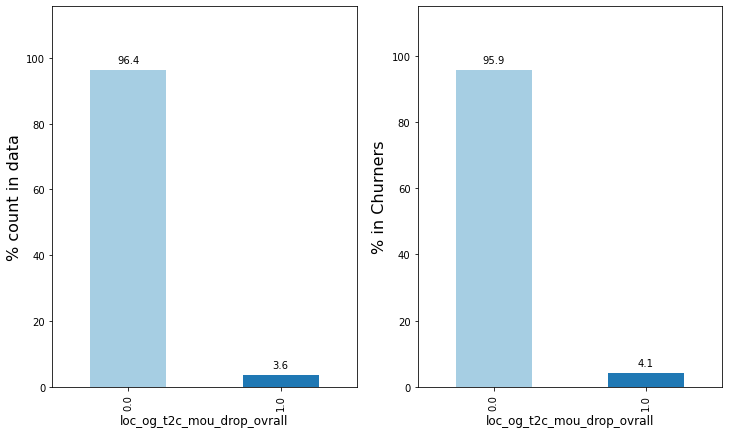

<Figure size 864x504 with 0 Axes>

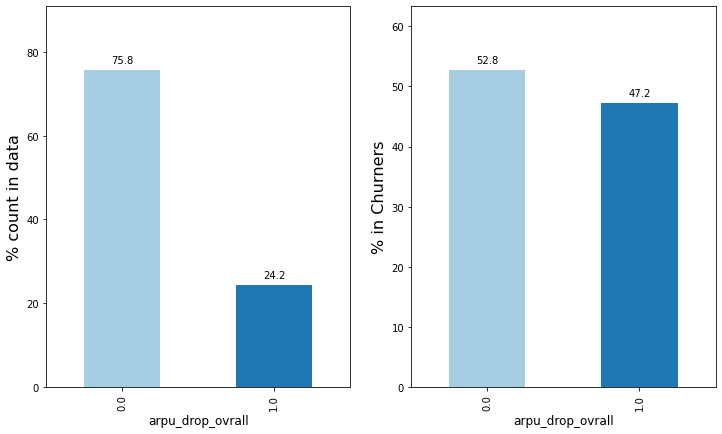

<Figure size 864x504 with 0 Axes>

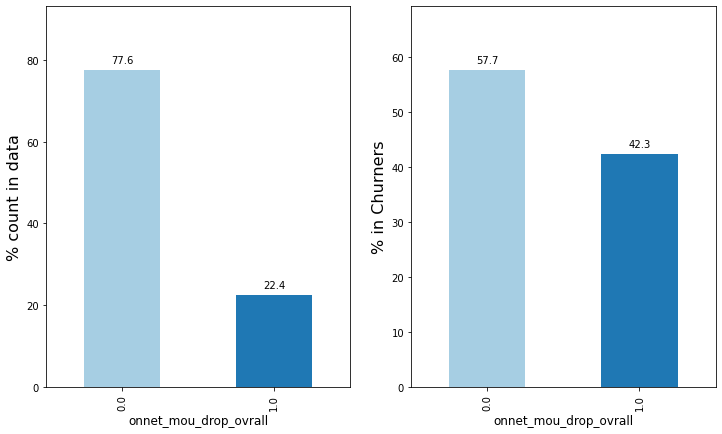

<Figure size 864x504 with 0 Axes>

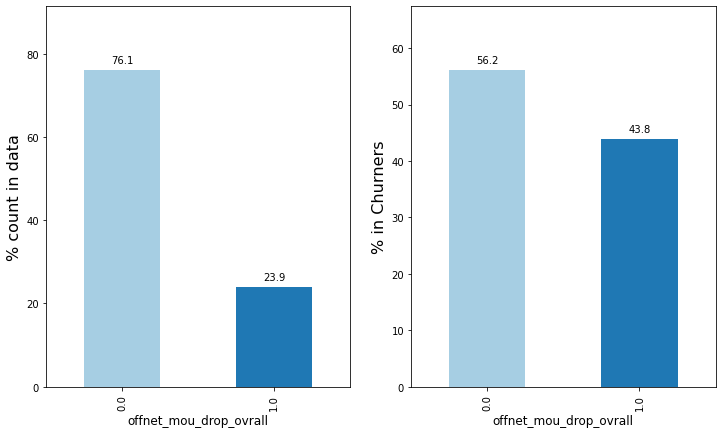

<Figure size 864x504 with 0 Axes>

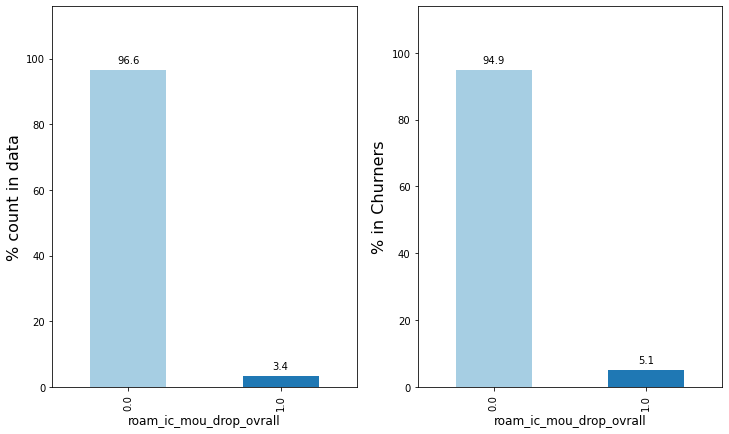

<Figure size 864x504 with 0 Axes>

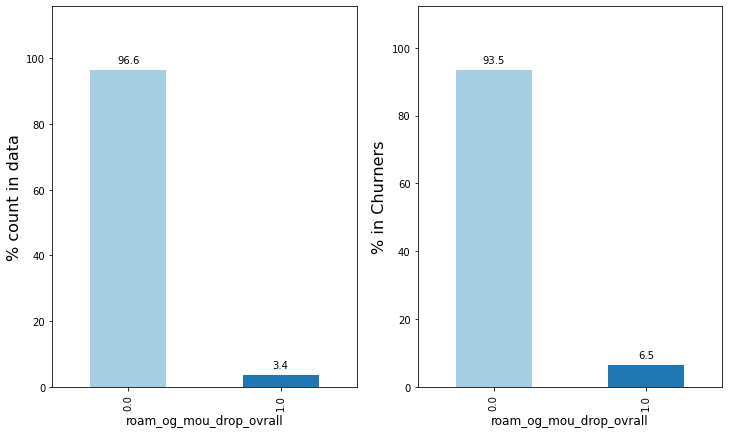

<Figure size 864x504 with 0 Axes>

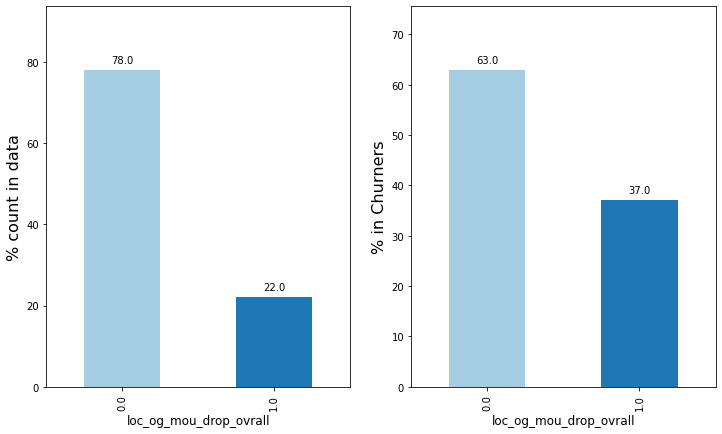

<Figure size 864x504 with 0 Axes>

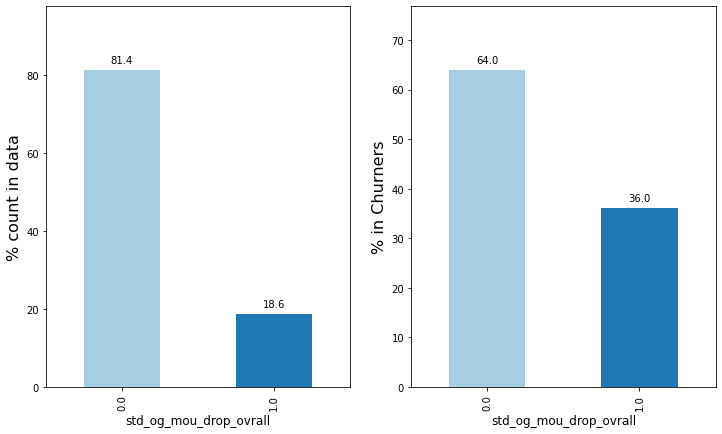

<Figure size 864x504 with 0 Axes>

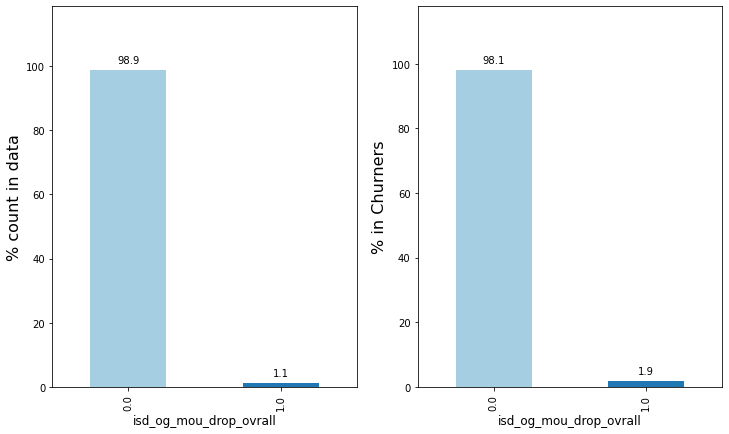

<Figure size 864x504 with 0 Axes>

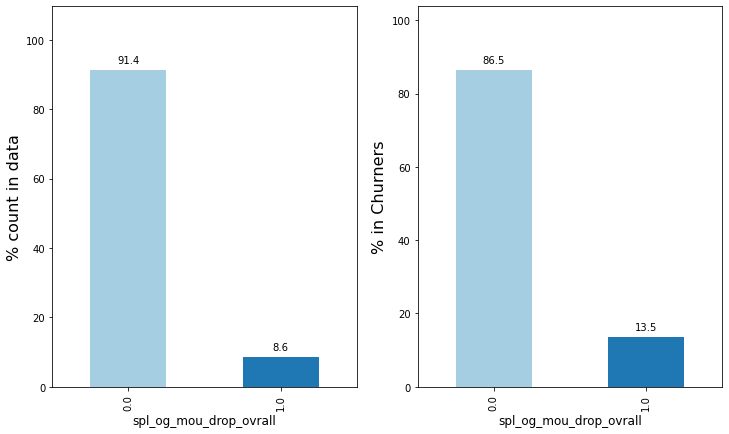

<Figure size 864x504 with 0 Axes>

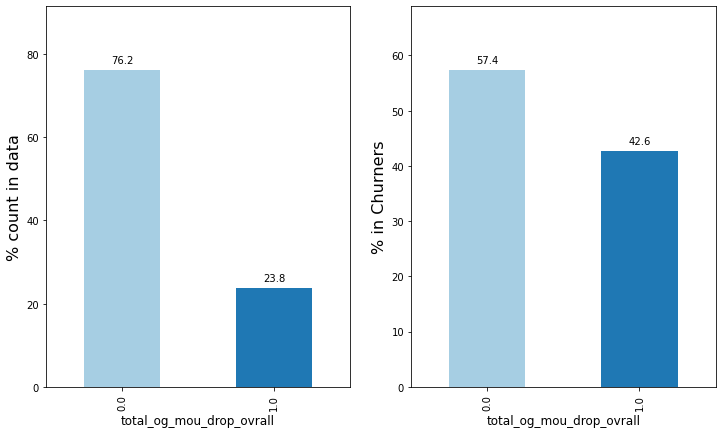

<Figure size 864x504 with 0 Axes>

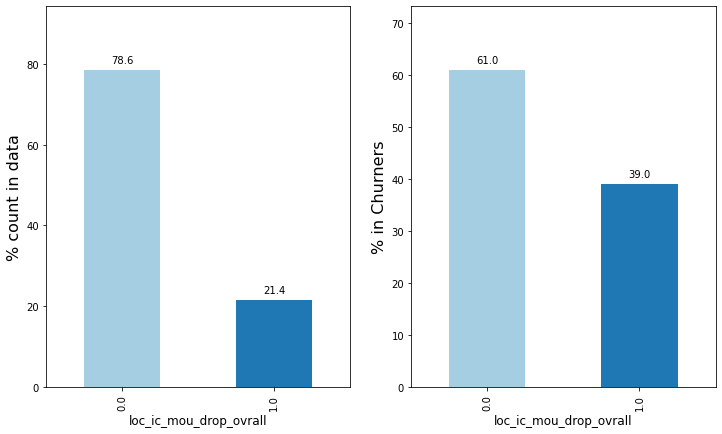

<Figure size 864x504 with 0 Axes>

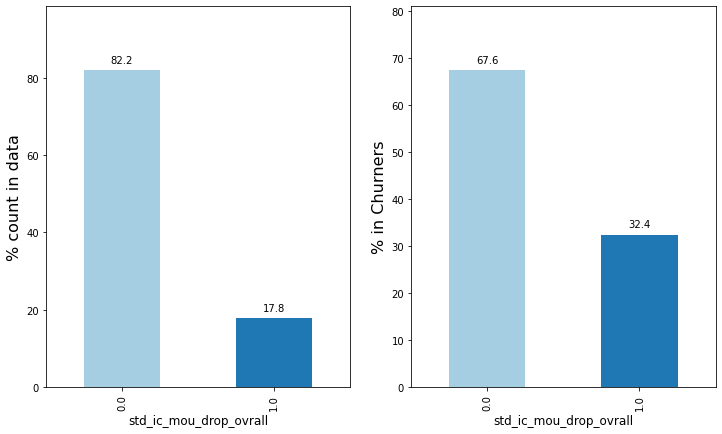

<Figure size 864x504 with 0 Axes>

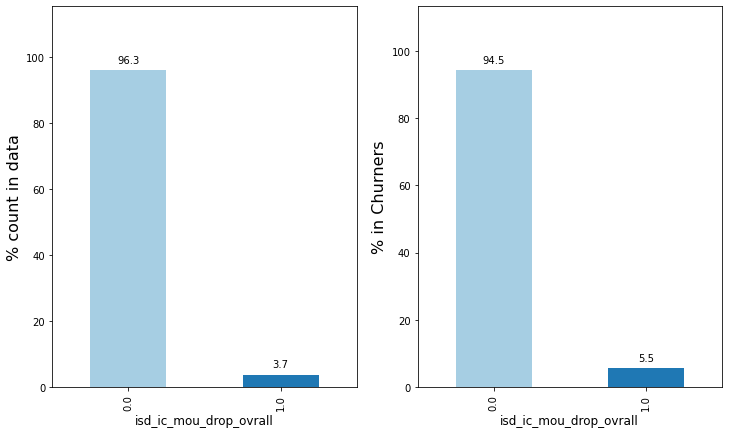

<Figure size 864x504 with 0 Axes>

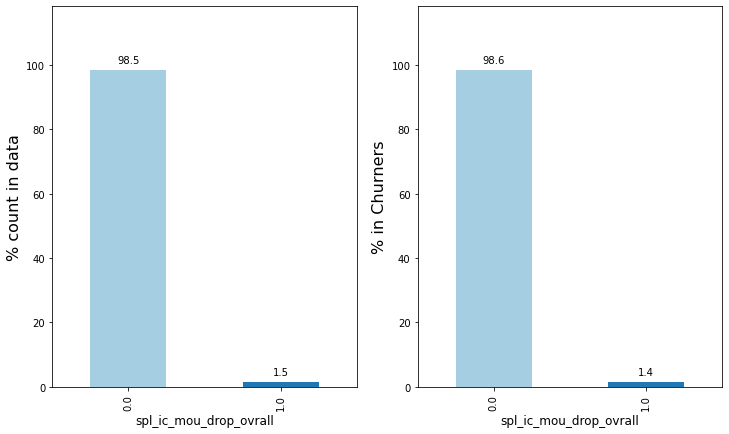

<Figure size 864x504 with 0 Axes>

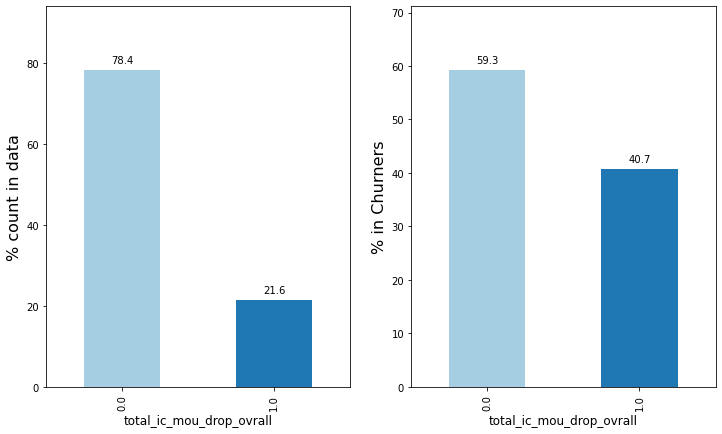

<Figure size 864x504 with 0 Axes>

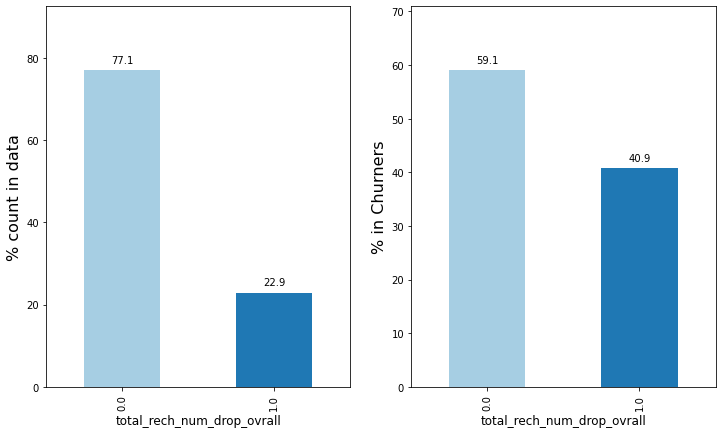

<Figure size 864x504 with 0 Axes>

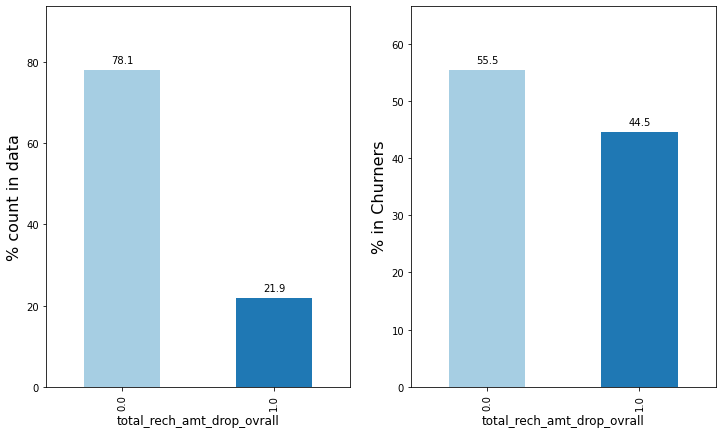

<Figure size 864x504 with 0 Axes>

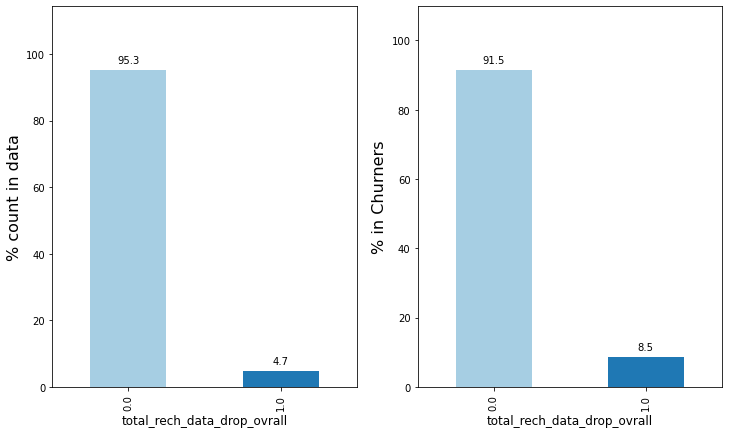

<Figure size 864x504 with 0 Axes>

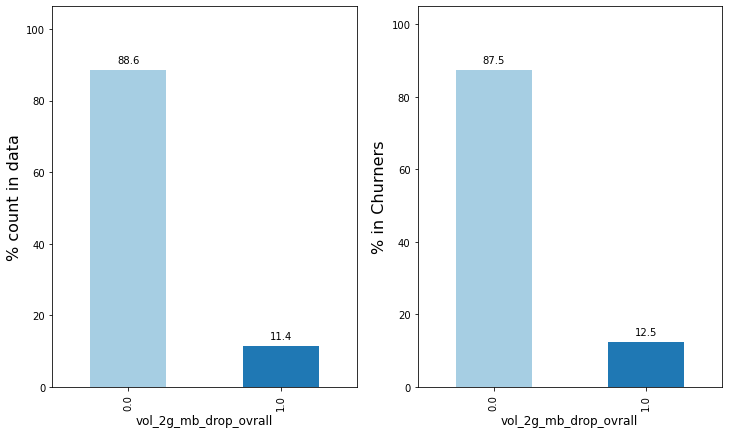

<Figure size 864x504 with 0 Axes>

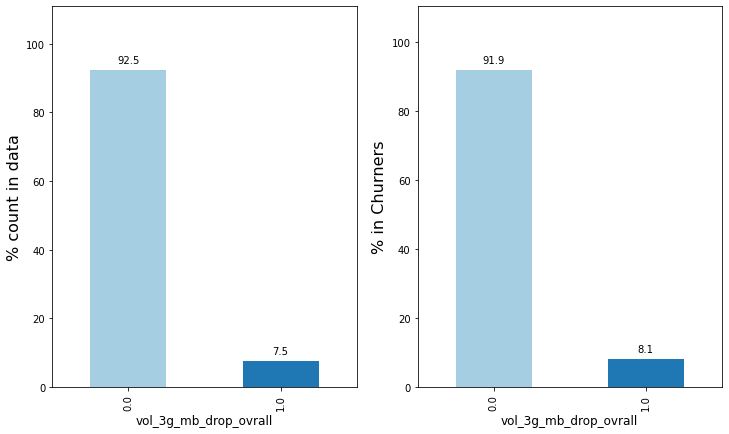

In [64]:
for i in cols:
    plt.figure(figsize=(12,7));
    default_rate_per_var(i);

- **From the above plots it resembles that arpu,onnet,offnet,total outgoing,incoming,number of recharges and total amount of recarge are highly dependent features for predicting churn.**

In [65]:
cols = [x for x in df_highvalue_cust.columns if x.endswith('diff_avg')]

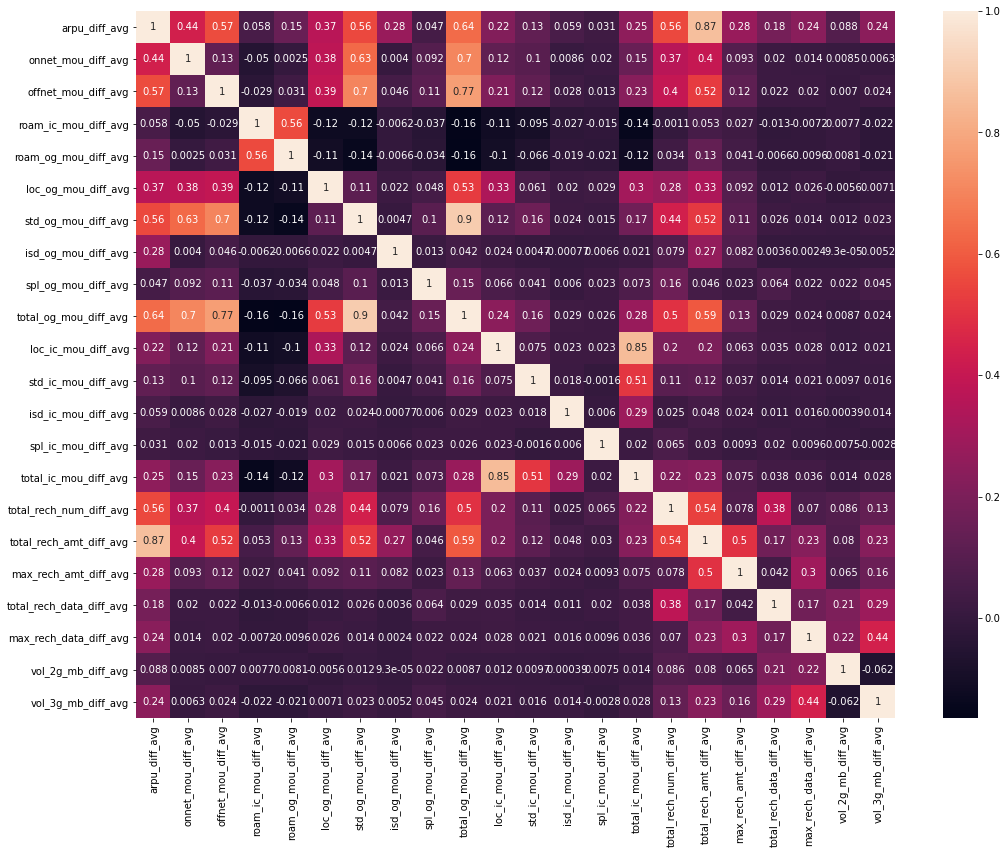

In [66]:
plt.figure(figsize=(17,13))
sns.heatmap(df_highvalue_cust[cols].corr(), annot = True);

In [67]:
# This user-defined function plots the distribution of target column, and its boxplot against Churn column
def plot_distribution(var):
    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    ax = sns.histplot(data=df_highvalue_cust, x=var, kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=var, y= 'Churn', data=df_highvalue_cust)
    plt.show()

In [68]:
# for i in cols:
#     plot_distribution(i)

In [69]:
df_highvalue_cust.head()

,aon,Churn,arpu_diff_avg,onnet_mou_diff_avg,offnet_mou_diff_avg,roam_ic_mou_diff_avg,roam_og_mou_diff_avg,loc_og_mou_diff_avg,std_og_mou_diff_avg,isd_og_mou_diff_avg,spl_og_mou_diff_avg,total_og_mou_diff_avg,loc_ic_mou_diff_avg,std_ic_mou_diff_avg,isd_ic_mou_diff_avg,spl_ic_mou_diff_avg,total_ic_mou_diff_avg,total_rech_num_diff_avg,total_rech_amt_diff_avg,max_rech_amt_diff_avg,total_rech_data_diff_avg,max_rech_data_diff_avg,vol_2g_mb_diff_avg,vol_3g_mb_diff_avg,og_others_drop,ic_others_drop,night_pck_user_drop,monthly_2g_drop,monthly_3g_drop,sachet_2g_drop,sachet_3g_drop,fb_user_drop,vbc_3g_drop,total_rech_amnt_data_drop,loc_og_t2c_mou_drop_ovrall,arpu_drop_ovrall,onnet_mou_drop_ovrall,offnet_mou_drop_ovrall,roam_ic_mou_drop_ovrall,roam_og_mou_drop_ovrall,loc_og_mou_drop_ovrall,std_og_mou_drop_ovrall,isd_og_mou_drop_ovrall,spl_og_mou_drop_ovrall,total_og_mou_drop_ovrall,loc_ic_mou_drop_ovrall,std_ic_mou_drop_ovrall,isd_ic_mou_drop_ovrall,spl_ic_mou_drop_ovrall,total_ic_mou_drop_ovrall,total_rech_num_drop_ovrall,total_rech_amt_drop_ovrall,total_rech_data_drop_ovrall,vol_2g_mb_drop_ovrall,vol_3g_mb_drop_ovrall
0,968,1,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,-9.975,-7.555,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,802,1,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.000,0.000,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,315,0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-177.970,-363.535,0,0,0,1,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21,720,0,81.6570,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,123.975,52.605,38.945,0.000,0.000,91.550,3.0,78.0,0.0,0.0,0.0,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,604,0,232.8425,-16.23,118.505,0.00,0.000,49.345,35.255,-0.005,17.66,102.270,78.690,48.375,-10.375,0.000,127.095,0.0,212.0,89.5,1.0,89.5,-0.230,710.375,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_highvalue_cust.shape
telecom = df_highvalue_cust.copy()
telecom.shape

(29824, 55)

(29824, 55)

## 5. Data Preparation

#### The below steps are to be done before Data Modelling

1. Split the dataset
2. Scale the data
3. SMOTE + undersampling - to overcome the imbalace in the data

In [71]:
# Importing Machine learning Scikit-learn Libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### Train Test split

In [72]:
# Divide data into train and test

X = telecom.drop("Churn", axis = 1)
y = telecom.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100, stratify = y)

In [73]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(20876, 54)

(20876,)

(8948, 54)

(8948,)

### Scaling

In [74]:
# Scale the data using MinMaxScaler

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Scale the data to overcome the outlier impact and bring the data centered to zero median
scaler = RobustScaler(quantile_range=(1, 99))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Class Imbalance Check

In [75]:
# change data type to category
# telecom['Churn'] = telecom['Churn'].astype("category")

telecom.Churn.value_counts()

# print churn ratio
print("Churn Ratio:")
telecom['Churn'].value_counts()*100/len(telecom)

0    27460
1     2364
Name: Churn, dtype: int64

Churn Ratio:


0    92.073498
1     7.926502
Name: Churn, dtype: float64

- **This seems to be imbalanced dataset. So we need to make it balanced before prediction.**

#### Pre-Processing Techniques
- https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/
As a part of pre-processing stage of ML pipelines prior, the following algorithms will be used for handling imbalanced dataset.

- Undersampling
- Random undersampling
- Oversampling
- Random oversampling: generates new samples by random resampling with replacement of under represented class
- Synthetic Minority Oversampling (SMOTE)
- Combined over and under sampling
- SMOTEENN
- SMOTETomek
##### Training techniques
Number of learning models themselves do provide some built in support to deal with imbalance data.

Sample weighting

#### Fact:

SMOTE allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Imbalanced-learn provides two ready-to-use combined samplers:

SMOTETomek
SMOTEENN
Both the methods are good but in general, SMOTEENN cleans more noisy data than SMOTETomek.

#### Note:

It is not possible to check different sampling techniques on very cost sensitive Machine Learning models like SVM, Decision Trees, Random Forest. For this Case Study, we will particularily use SMOTEENN sampling technique to handle imbalanced dataset as it is uses both over-sampling and under-sampling method and helps in cleaning noisy samples.

In [76]:
# Oversample with SMOTE and random undersample for imbalanced dataset

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# counter = Counter(y_train)
# print('before : ' , counter)

# # define pipeline
# over = SMOTE(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)

# # transform the dataset
# X_train_bal, y_train_bal = pipeline.fit_resample(X_train_scaled, y_train)

# # summarize the new class distribution
# counter = Counter(y_train_bal)
# print('after  : ' , counter)

### Handling Class Imbalance using SMOTE

In [77]:
#### Implement SMOTE to balance the imbaance in the data

counter = Counter(y_train)
print('before : ' , counter)

over = SMOTE(random_state=100,n_jobs=-1)
X_train_bal, y_train_bal = over.fit_sample(X_train_scaled, y_train)

# summarize the new class distribution
counter = Counter(y_train_bal)
print('after  : ' , counter)

print("X_train_bal: \n", X_train_bal.shape)
print("y_train_bal: \n", y_train_bal.shape)

before :  Counter({0: 19221, 1: 1655})
after  :  Counter({0: 19221, 1: 19221})
X_train_bal: 
 (38442, 54)
y_train_bal: 
 (38442,)


In [78]:
X_train_resampled = pd.DataFrame(data = X_train_bal)
y_train_resampled = pd.DataFrame(data = y_train_bal)
print("X_train_resampled: \n", X_train_resampled.shape)
print("y_train_resampled: \n", y_train_resampled.shape)

X_train_resampled: 
 (38442, 54)
y_train_resampled: 
 (38442, 1)


### Dimensionality Reduction

In [79]:
def perform_PCA(X_train):
    pca = PCA(svd_solver = 'randomized',random_state=100)
    
    #fit the data
    pca.fit(X_train)
    
    #plot cummulative variance against no. of components
    var_cumu = np.cumsum(pca.explained_variance_ratio_)
    fig = plt.figure(figsize=[8,4])
    #plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
    plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
    plt.plot(var_cumu)
    plt.ylabel("Cumulative variance explained")
    plt.show()

In [80]:
def perform_increpca(X_train,X_test,no_comp):
    pca_final = IncrementalPCA(n_components=no_comp)
    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print('X_train_data',X_train_pca.shape)
    #print(y_train_bal.shape)
    print('X_test_data',X_test_pca.shape)
    #print(y_test.shape)
    
    # create a correlation map for principal components derived from PCA
    corrmat = np.corrcoef(X_train_pca.transpose())
    
    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    return X_train_pca, X_test_pca

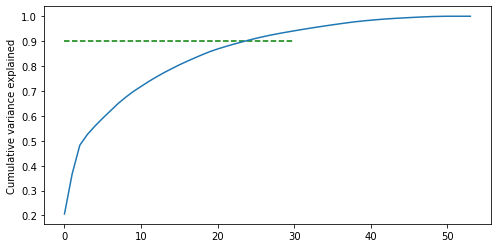

In [81]:
perform_PCA(X_train_bal)
#perform_PCA(X_train_scaled)

- For 95% variance the number of components to be choosen is 30

X_train_data (38442, 30)
X_test_data (8948, 30)


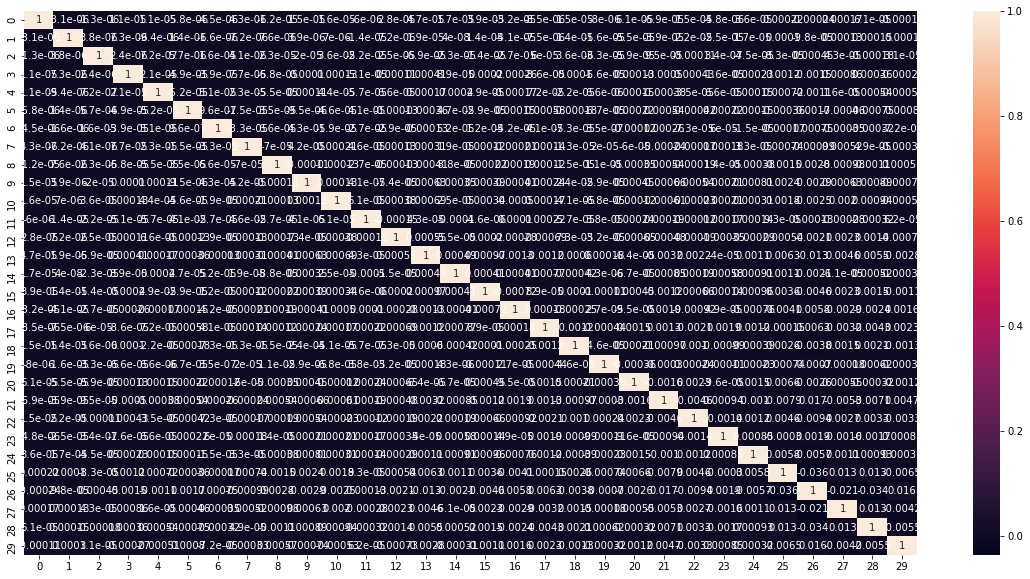

In [82]:
X_train_pca,X_test_pca = perform_increpca(X_train_bal,X_test_scaled,30)
#X_train_pca,X_test_pca = perform_increpca(X_train_scaled,X_test_scaled,40)

- From above heatmap it shows that data is nicely spearated from each other features i.e. no multicollinearity

### User-defined functions for repetitive tasks for training & evaluation

In [83]:
def get_churnprob(df_train_pca):
    y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
    y_train_pred_final = pd.DataFrame({'Churn':y_train_bal, 'Churn_Prob':y_train_pred})
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
    y_train_pred_final.head()
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','specificity'])        
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','specificity'])
    plt.show()

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
def get_scores(scores,model_pca,X_test_pca):
    #if prob_churn > 0:
        #y_test_pred_probs = model_pca.predict_proba(X_test_pca)[:,1]
        #y_test_pred = np.where(model_pca.predict_proba(X_test_pca)[:,1] > prob_churn, 1, 0)
        #y_test_df=pd.DataFrame(y_test)
        #y_pred_df=pd.DataFrame(y_test_pred_probs)
        #y_test_df.reset_index(drop=True, inplace=True)
        #y_pred_df.reset_index(drop=True, inplace=True)
        #y_test_pred_final=pd.concat([y_test_df, y_pred_df],axis=1)
        # Renaming the column
        #y_test_pred_final = y_test_pred_final.rename(columns={ 0 : 'Churn_prob'})
        #y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > prob_churn else 0)
    #else:
    y_test_pred_probs = model_pca.predict_proba(X_test_pca)[:,1]
    y_test_pred = model_pca.predict(X_test_pca)
    test_confusion = confusion_matrix(y_test, y_test_pred)       
    TP = test_confusion[1,1] # true positive
    TN = test_confusion[0,0] # true negatives
    FP = test_confusion[0,1] # false positives
    FN = test_confusion[1,0] # false negatives
    
    # Let's see the parameters of our logistic regression model
    model_Accuracy = accuracy_score(y_test,y_test_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs, drop_intermediate = False )
    p,r,t = precision_recall_curve(y_test,y_test_pred)
    model_Recall = recall_score(y_test,y_test_pred)
    model_f1_score = f1_score(y_test,y_test_pred)
    model_Precision = precision_score(y_test,y_test_pred)
    model_auc_score = auc(fpr,tpr)
    model_roc_area = roc_auc_score(y_test,y_test_pred_probs)
    model_FalsePositiveRate = FP / float(FP + TN)
    model_Specificity = TN / float(TN + FP)
    model_FalseNegativeRate = FN / float(FN + TP)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(p,r)
    
    print('model_Accuracy-',model_Accuracy)
    print('model_Recall/Sensitivity-',model_Recall)
    print('model_Precision/TPR-',model_Precision)
    print('model_f1_score-',model_f1_score)
    print('model_auc_score-',model_auc_score)
    print('model_roc_area-',model_roc_area)
    print('FPR-',model_FalsePositiveRate)
    print('Specificity/TNR-',model_Specificity)
    print('FNR-',model_FalseNegativeRate)
    
    scores.append((model_f1_score,model_Precision,model_Recall,model_Accuracy,model_auc_score, model_auc_pr,test_confusion))  
    # Plot ROC and PR curves using all models and test data
   
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))
    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    #draw_roc(y_test,y_test_pred)
    #precision_recall_curve(y_test,y_test_pred)
    #plt.plot(thresholds, p, "g-")
    #plt.plot(thresholds, r, "r-")
    plt.show()
    return scores

In [86]:
def hypertuning_plot(scores, parameter):
    
    col = "param_" + parameter
    
    plt.figure()
    
    plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

## 6. Model Building

### Logistic Regression

In [87]:
lr_pca = LogisticRegression(class_weight='balanced')
model_pca = lr_pca.fit(X_train_pca, y_train_bal)
#get_churnprob(X_train_pca)

model_Accuracy- 0.7966025927581583
model_Recall/Sensitivity- 0.7221438645980254
model_Precision/TPR- 0.23981264637002342
model_f1_score- 0.360056258790436
model_auc_score- 0.8272540504063118
model_roc_area- 0.8272540504063116
FPR- 0.19698992596188858
Specificity/TNR- 0.8030100740381114
FNR- 0.2778561354019746


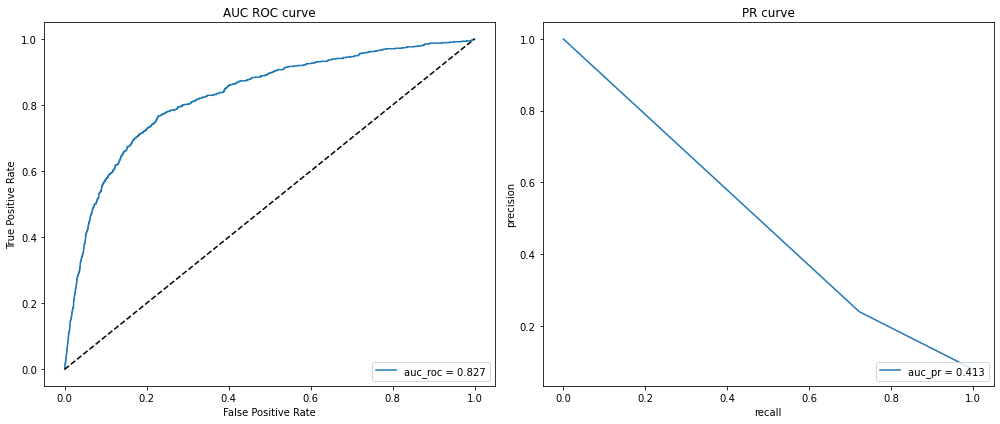

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.360056,0.239813,0.722144,0.796603,0.827254,0.412751,"[[6616, 1623], [197, 512]]"


In [88]:
scores = []
scores = get_scores(scores,model_pca,X_test_pca)
# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc','auc_pr', 'confusion_matrix'])
sampling_results

In [89]:
##Logistic Regression - HyperTuning Penalty

# GridSearchCV to find best penalty

lr = LogisticRegression(class_weight={0:0.1, 1: 0.9})

parameter = ['penalty','C']

# parameters to build the model on
param_grid = {'penalty': ['l1', 'l2','none'],
              'C': [0.1,0.5,1,5,10,50,100,400,500,1000]
             }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

gc = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'recall',n_jobs = -1, cv = folds, verbose = 2,return_train_score=True)   
gc.fit(X_train_pca,y_train_bal)

#print(scores)
# Plot the scores
#for param in parameter:
   # print(param)
    #hypertuning_plot(scores, param)
# scores of GridSearch CV
cv_results = pd.DataFrame(gc.cv_results_)
# Get the best value
gc.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 400, 500, 1000],
                         'penalty': ['l1', 'l2', 'none']},
             return_train_score=True, scoring='recall', verbose=2)

{'C': 0.1, 'penalty': 'l2'}

In [90]:
cv_results[cv_results['rank_test_score']==1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.321143,0.014699,0.012167,0.001163,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.991675,0.994538,0.991675,0.990375,0.985952,0.990843,0.002799,1,0.99083,0.990635,0.991156,0.990895,0.991221,0.990947,0.000215


In [91]:
print("Best AUC: ", gc.best_score_)
print("Best hyperparameters: ", gc.best_params_)

Best AUC:  0.9908431561726582
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [92]:
# predict churn on test data
y_pred = gc.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = gc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1089 7150]
 [  15  694]]
Sensitivity: 	0.98
Specificity: 	0.13
AUC:    	 0.82


model_Accuracy- 0.717143495753241
model_Recall/Sensitivity- 0.8067700987306065
model_Precision/TPR- 0.1928523263654754
model_f1_score- 0.3112925170068027
model_auc_score- 0.827083887205422
model_roc_area- 0.8270838872054223
FPR- 0.2905692438402719
Specificity/TNR- 0.7094307561597282
FNR- 0.19322990126939352


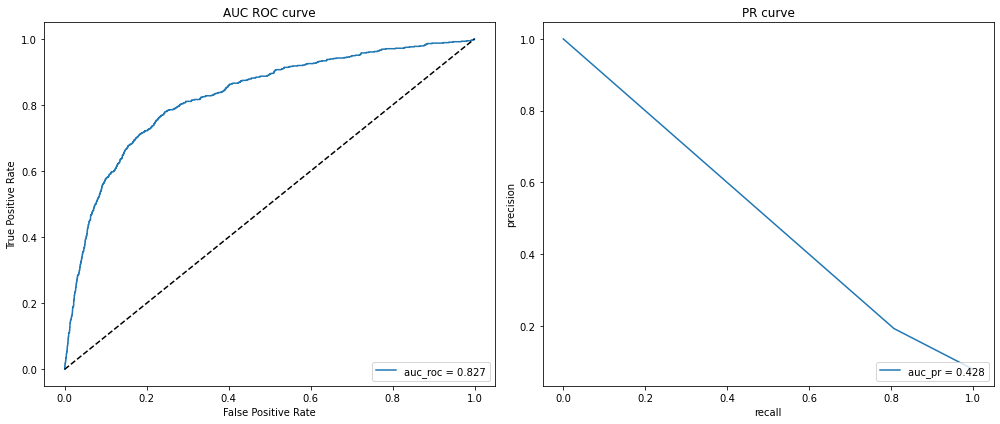

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.311293,0.192852,0.80677,0.717143,0.827084,0.428231,"[[5845, 2394], [137, 572]]"


In [93]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression(penalty = 'l2', C = 0.1, class_weight={0:0.4, 1: 0.6})

lrf = lr.fit(X_train_pca,y_train_bal)
#lef.predict(X_test_pca.values)[:, 1:]
# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lrf, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

In [94]:
print(classification_report(y_test, gc.predict(X_test_pca), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.13      0.23      8239
           1       0.09      0.98      0.16       709

    accuracy                           0.20      8948
   macro avg       0.54      0.56      0.20      8948
weighted avg       0.92      0.20      0.23      8948



### Decision Trees

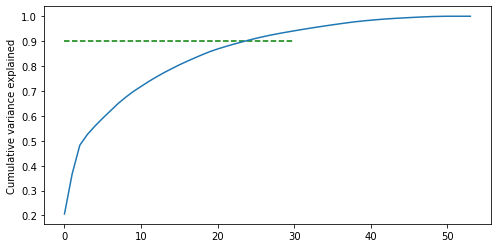

In [95]:
perform_PCA(X_train_bal)

X_train_data (38442, 30)
X_test_data (8948, 30)


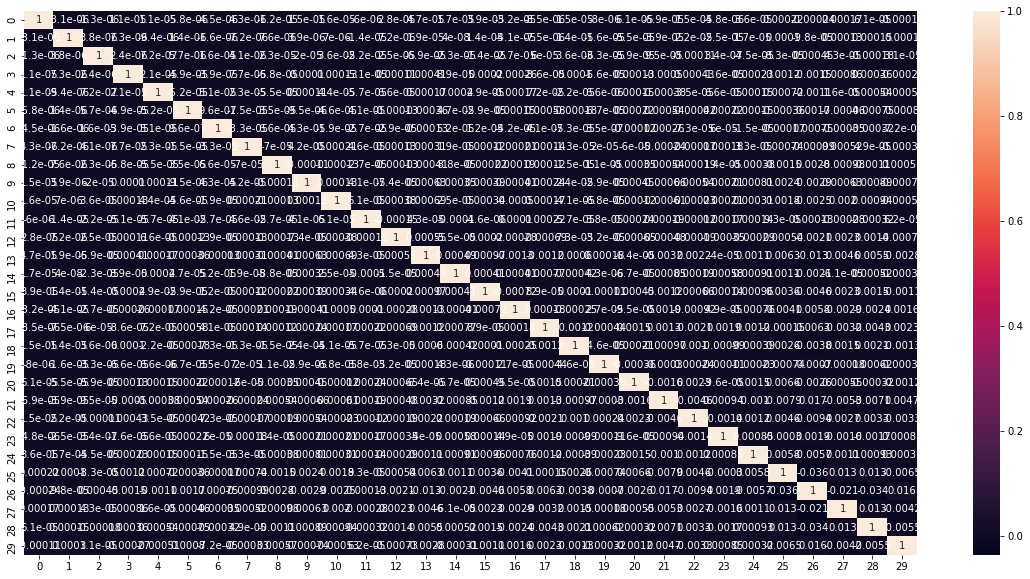

In [96]:
X_train_dt,X_test_dt = perform_increpca(X_train_bal,X_test,30)

In [97]:
from sklearn.tree import DecisionTreeClassifier

score = make_scorer('auc_score', greater_is_better=True)
param_grid={'max_depth':[5,10,20,None],'max_features':['sqrt','log2',None],'class_weight':['balanced']}
gc = GridSearchCV(DecisionTreeClassifier(),cv=5,refit=True,param_grid=param_grid,scoring='recall')
gc.fit(X_train_dt,y_train_bal)
print('best estimator',gc.best_estimator_)
print('best score',gc.best_score_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='recall')

best estimator DecisionTreeClassifier(class_weight='balanced', max_depth=20)
best score 0.9082774093414289


In [98]:
print("Best AUC: ", gc.best_score_)
print("Best hyperparameters: ", gc.best_params_)

Best AUC:  0.9082774093414289
Best hyperparameters:  {'class_weight': 'balanced', 'max_depth': 20, 'max_features': None}


In [99]:
# predict churn on test data
y_pred = gc.predict(X_test_dt)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = gc.predict_proba(X_test_dt)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3868 4371]
 [ 131  578]]
Sensitivity: 	0.82
Specificity: 	0.47
AUC:    	 0.64


### Random Forest

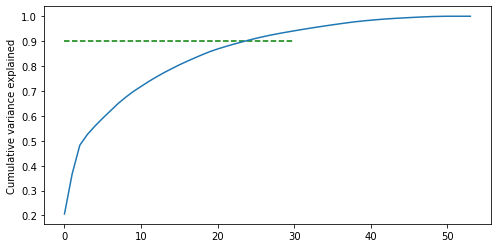

X_train_data (38442, 30)
X_test_data (8948, 30)


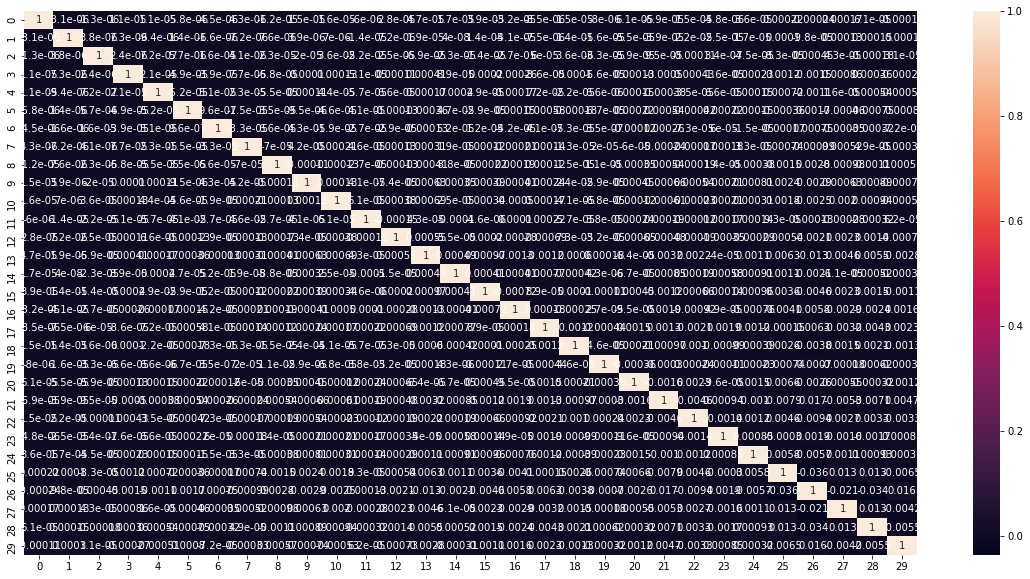

In [100]:
perform_PCA(X_train_bal)
X_train_dt,X_test_dt = perform_increpca(X_train_bal,X_test,30)

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV - HPT 

n_estimators = [100, 200, 500, 700, 900, 1000] # no of tress [200,210,220,230.....20000]
max_features = ['auto', 'sqrt']
max_depth = [4,5,6,7,8]
min_samples_split = [2, 5, 8, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' :['gini', 'entropy'],
               'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},random_state=100)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state = 100, n_jobs=-1)
rf_random.fit(X_train_dt, y_train_bal)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 86.0min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 0.1,
                                                                  1: 0.9},
                                                    random_state=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [100, 200, 500, 700,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [102]:
print("Best AUC: ", gc.best_score_)
print("Best hyperparameters: ", gc.best_params_)

Best AUC:  0.9082774093414289
Best hyperparameters:  {'class_weight': 'balanced', 'max_depth': 20, 'max_features': None}


In [103]:
# predict churn on test data
y_pred = gc.predict(X_test_dt)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = gc.predict_proba(X_test_dt)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3868 4371]
 [ 131  578]]
Sensitivity: 	0.82
Specificity: 	0.47
AUC:    	 0.64


In [104]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))
# check area under curve
#y_pred_prob = gc.predict_proba(X_test_dt)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))
print('model_Recall:',round(recall_score(y_test,y_pred),2))
print('model_f1_score:',round(f1_score(y_test,y_pred),2))
print('model_Precision:',round( precision_score(y_test,y_pred),2))

Sensitivity: 0.82
Specificity: 0.47
AUC: 0.64
model_Recall: 0.82
model_f1_score: 0.2
model_Precision: 0.12


### XGBOOST

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb_cfl = XGBClassifier(use_label_encoder=False,n_jobs = -1,objective = 'binary:logistic',eval_metric='error')
# Fit the model to our train and target
xgb_cfl.fit(X_train_dt, y_train_bal)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_dt)
#xgb_predictions_prob = 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [110]:
# predict churn on test data
y_pred = xgb_cfl.predict(X_test_dt)
y_pred_prob = xgb_cfl.predict_proba(X_test_dt)[:,1]
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
#y_pred_prob = gc.predict_proba(X_test_dt)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7978  261]
 [ 644   65]]
Sensitivity: 	0.09
Specificity: 	0.97
AUC:    	 0.77


## Model to choose best features

In [111]:
df =df_highvalue_cust.copy()

In [112]:
df_highvalue_cust.head()

,aon,Churn,arpu_diff_avg,onnet_mou_diff_avg,offnet_mou_diff_avg,roam_ic_mou_diff_avg,roam_og_mou_diff_avg,loc_og_mou_diff_avg,std_og_mou_diff_avg,isd_og_mou_diff_avg,spl_og_mou_diff_avg,total_og_mou_diff_avg,loc_ic_mou_diff_avg,std_ic_mou_diff_avg,isd_ic_mou_diff_avg,spl_ic_mou_diff_avg,total_ic_mou_diff_avg,total_rech_num_diff_avg,total_rech_amt_diff_avg,max_rech_amt_diff_avg,total_rech_data_diff_avg,max_rech_data_diff_avg,vol_2g_mb_diff_avg,vol_3g_mb_diff_avg,og_others_drop,ic_others_drop,night_pck_user_drop,monthly_2g_drop,monthly_3g_drop,sachet_2g_drop,sachet_3g_drop,fb_user_drop,vbc_3g_drop,total_rech_amnt_data_drop,loc_og_t2c_mou_drop_ovrall,arpu_drop_ovrall,onnet_mou_drop_ovrall,offnet_mou_drop_ovrall,roam_ic_mou_drop_ovrall,roam_og_mou_drop_ovrall,loc_og_mou_drop_ovrall,std_og_mou_drop_ovrall,isd_og_mou_drop_ovrall,spl_og_mou_drop_ovrall,total_og_mou_drop_ovrall,loc_ic_mou_drop_ovrall,std_ic_mou_drop_ovrall,isd_ic_mou_drop_ovrall,spl_ic_mou_drop_ovrall,total_ic_mou_drop_ovrall,total_rech_num_drop_ovrall,total_rech_amt_drop_ovrall,total_rech_data_drop_ovrall,vol_2g_mb_drop_ovrall,vol_3g_mb_drop_ovrall
0,968,1,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,-9.975,-7.555,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,802,1,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.000,0.000,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,315,0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-177.970,-363.535,0,0,0,1,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21,720,0,81.6570,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,123.975,52.605,38.945,0.000,0.000,91.550,3.0,78.0,0.0,0.0,0.0,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,604,0,232.8425,-16.23,118.505,0.00,0.000,49.345,35.255,-0.005,17.66,102.270,78.690,48.375,-10.375,0.000,127.095,0.0,212.0,89.5,1.0,89.5,-0.230,710.375,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# Divide data into train and test

X = df.drop("Churn", axis = 1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100, stratify = y)

In [114]:
scaler_feat = RobustScaler()
X_train_scaled = scaler_feat.fit_transform(X_train)
X_test_scaled = scaler_feat.transform(X_test)

In [115]:
X_train = pd.DataFrame(data = X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = X_test_scaled, index = X_test.index, columns = X_test.columns)

### RFE

In [116]:

import statsmodels.api as sm
from sklearn.feature_selection import RFE
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
n_features_list = list(range(30, 40)) #checking for optimal number of features between 20 to 60
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(30, 40):

    # RFE with n features
    lm = LogisticRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_sm = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_sm.predict(X_test_rfe_n)
    y_pred_train = lm_sm.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_sm.rsquared_adj)
    train_r2.append(lm_sm.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

RFE(estimator=LogisticRegression(), n_features_to_select=30)

RFE(estimator=LogisticRegression(), n_features_to_select=31)

RFE(estimator=LogisticRegression(), n_features_to_select=32)

RFE(estimator=LogisticRegression(), n_features_to_select=33)

RFE(estimator=LogisticRegression(), n_features_to_select=34)

RFE(estimator=LogisticRegression(), n_features_to_select=35)

RFE(estimator=LogisticRegression(), n_features_to_select=36)

RFE(estimator=LogisticRegression(), n_features_to_select=37)

RFE(estimator=LogisticRegression(), n_features_to_select=38)

RFE(estimator=LogisticRegression(), n_features_to_select=39)

Text(0.5, 0, 'Features Count')

Text(0.5, 0, 'Features Count')

([<matplotlib.axis.XTick at 0x13cc6b06970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

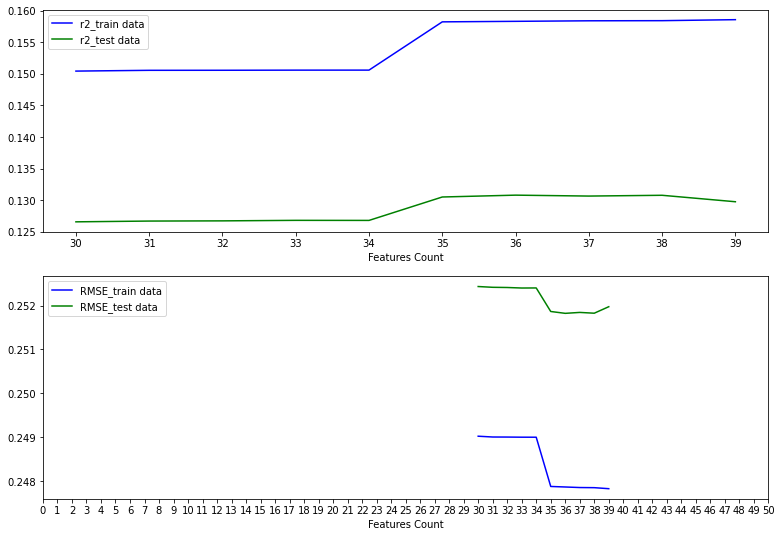

In [118]:
# plotting r2 and RMSE against n_features
#reference from web and modified accordingly
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')
#method 1 of ticks
ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)
#plt.show()

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')
#method 2 of ticks
ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 51, step=1))

plt.show()

In [119]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 35)             # running RFE with 35 variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('aon', True, 1),
 ('arpu_diff_avg', True, 1),
 ('onnet_mou_diff_avg', False, 6),
 ('offnet_mou_diff_avg', False, 5),
 ('roam_ic_mou_diff_avg', False, 17),
 ('roam_og_mou_diff_avg', False, 20),
 ('loc_og_mou_diff_avg', False, 3),
 ('std_og_mou_diff_avg', True, 1),
 ('isd_og_mou_diff_avg', False, 15),
 ('spl_og_mou_diff_avg', False, 7),
 ('total_og_mou_diff_avg', False, 12),
 ('loc_ic_mou_diff_avg', True, 1),
 ('std_ic_mou_diff_avg', False, 14),
 ('isd_ic_mou_diff_avg', False, 16),
 ('spl_ic_mou_diff_avg', True, 1),
 ('total_ic_mou_diff_avg', True, 1),
 ('total_rech_num_diff_avg', True, 1),
 ('total_rech_amt_diff_avg', False, 8),
 ('max_rech_amt_diff_avg', True, 1),
 ('total_rech_data_diff_avg', True, 1),
 ('max_rech_data_diff_avg', False, 13),
 ('vol_2g_mb_diff_avg', False, 10),
 ('vol_3g_mb_diff_avg', False, 19),
 ('og_others_drop', True, 1),
 ('ic_others_drop', True, 1),
 ('night_pck_user_drop', True, 1),
 ('monthly_2g_drop', True, 1),
 ('monthly_3g_drop', True, 1),
 ('sachet_2g_dro

In [120]:
X_train.columns[rfe.support_]

Index(['aon', 'arpu_diff_avg', 'std_og_mou_diff_avg', 'loc_ic_mou_diff_avg',
       'spl_ic_mou_diff_avg', 'total_ic_mou_diff_avg',
       'total_rech_num_diff_avg', 'max_rech_amt_diff_avg',
       'total_rech_data_diff_avg', 'og_others_drop', 'ic_others_drop',
       'night_pck_user_drop', 'monthly_2g_drop', 'monthly_3g_drop',
       'sachet_2g_drop', 'sachet_3g_drop', 'fb_user_drop', 'vbc_3g_drop',
       'total_rech_amnt_data_drop', 'loc_og_t2c_mou_drop_ovrall',
       'arpu_drop_ovrall', 'onnet_mou_drop_ovrall', 'offnet_mou_drop_ovrall',
       'roam_ic_mou_drop_ovrall', 'roam_og_mou_drop_ovrall',
       'loc_og_mou_drop_ovrall', 'std_og_mou_drop_ovrall',
       'total_og_mou_drop_ovrall', 'loc_ic_mou_drop_ovrall',
       'std_ic_mou_drop_ovrall', 'isd_ic_mou_drop_ovrall',
       'spl_ic_mou_drop_ovrall', 'total_ic_mou_drop_ovrall',
       'total_rech_num_drop_ovrall', 'vol_3g_mb_drop_ovrall'],
      dtype='object')

In [121]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_train.columns[rfe.support_]]

In [122]:
X_train_rfe.head()

,aon,arpu_diff_avg,std_og_mou_diff_avg,loc_ic_mou_diff_avg,spl_ic_mou_diff_avg,total_ic_mou_diff_avg,total_rech_num_diff_avg,max_rech_amt_diff_avg,total_rech_data_diff_avg,og_others_drop,ic_others_drop,night_pck_user_drop,monthly_2g_drop,monthly_3g_drop,sachet_2g_drop,sachet_3g_drop,fb_user_drop,vbc_3g_drop,total_rech_amnt_data_drop,loc_og_t2c_mou_drop_ovrall,arpu_drop_ovrall,onnet_mou_drop_ovrall,offnet_mou_drop_ovrall,roam_ic_mou_drop_ovrall,roam_og_mou_drop_ovrall,loc_og_mou_drop_ovrall,std_og_mou_drop_ovrall,total_og_mou_drop_ovrall,loc_ic_mou_drop_ovrall,std_ic_mou_drop_ovrall,isd_ic_mou_drop_ovrall,spl_ic_mou_drop_ovrall,total_ic_mou_drop_ovrall,total_rech_num_drop_ovrall,vol_3g_mb_drop_ovrall
95711,-0.249952,0.073372,-0.009435,-0.383113,0.050,-0.709108,-0.272727,-0.043103,-4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33449,-0.388942,-0.165548,-0.197811,1.109504,0.000,0.459913,0.000000,-0.413793,-2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58394,0.040315,-0.528876,-3.450195,0.390062,0.000,0.428240,1.181818,1.017241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26183,0.109426,0.015667,0.006532,0.618175,0.000,0.503661,0.363636,-1.327586,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83789,0.712997,0.711704,0.150475,1.539372,-0.095,1.175824,1.454545,0.379310,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### create a heatmap to check correlation

In [123]:
corr_val = X_train_rfe.corr()
corr_val.loc[:,:] = np.tril(corr_val, k=-1)
corr_val = corr_val.stack()
val = corr_val[(corr_val >= 0.60) | (corr_val <= -0.60)].sort_values()

In [124]:
corre_values = val.index.tolist()
corre_values

[('total_og_mou_drop_ovrall', 'loc_og_mou_drop_ovrall'),
 ('total_og_mou_drop_ovrall', 'offnet_mou_drop_ovrall'),
 ('roam_og_mou_drop_ovrall', 'roam_ic_mou_drop_ovrall'),
 ('total_ic_mou_drop_ovrall', 'loc_ic_mou_drop_ovrall'),
 ('total_ic_mou_diff_avg', 'loc_ic_mou_diff_avg'),
 ('fb_user_drop', 'night_pck_user_drop')]

In [125]:
cols_todrop = []
for i in range(len(corre_values)):
    cols_todrop.append(corre_values[i][1])
cols_todrop

['loc_og_mou_drop_ovrall',
 'offnet_mou_drop_ovrall',
 'roam_ic_mou_drop_ovrall',
 'loc_ic_mou_drop_ovrall',
 'loc_ic_mou_diff_avg',
 'night_pck_user_drop']

<Figure size 1224x936 with 0 Axes>

<AxesSubplot:>

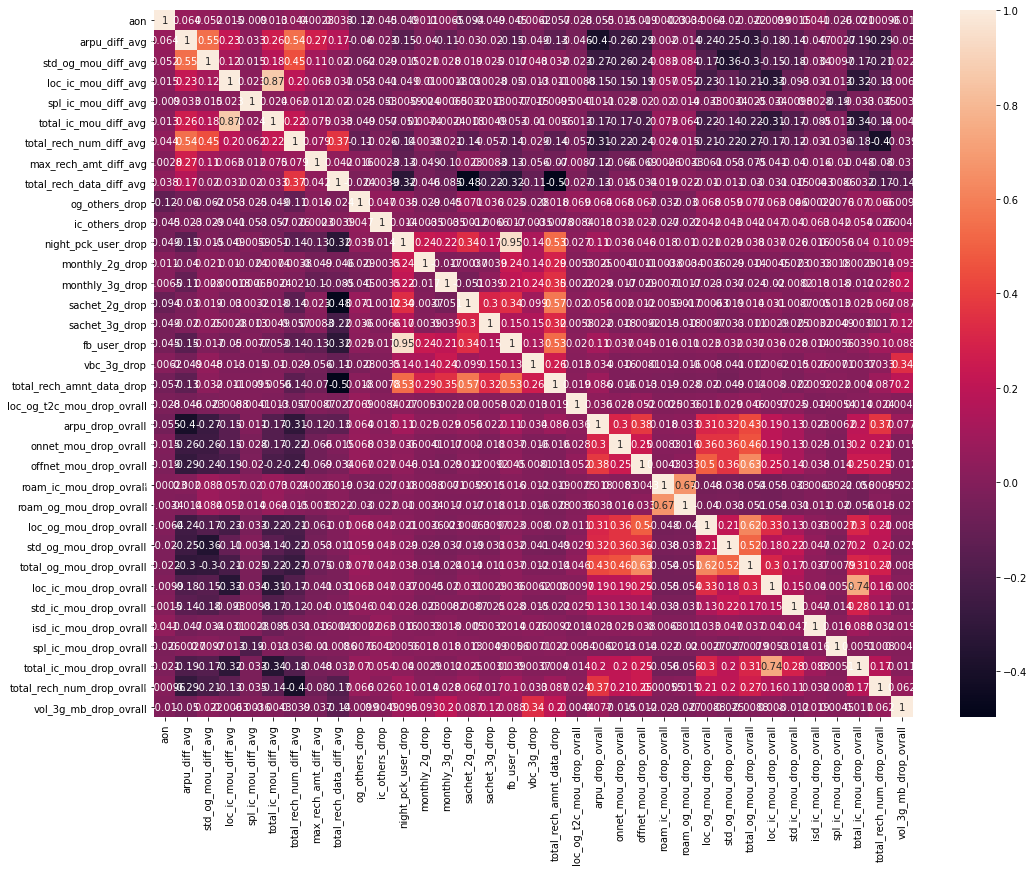

In [126]:
plt.figure(figsize=(17,13))
sns.heatmap(X_train_rfe.corr(), annot = True);
plt.show()

In [127]:
# Drop columns with high correlation from above heatmap
#cols_todrop = ['night_pck_user_drop','loc_ic_mou_drop_ovrall','total_rech_amt_drop_ovrall','spl_ic_mou_drop_ovrall','total_og_mou_drop_ovrall']
X_train_rfe = X_train_rfe.drop(cols_todrop,axis=1)
X_test_rfe = X_test_rfe.drop(cols_todrop,axis=1)

#### Assessing model using rfe columns

In [128]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20846
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4350.9
Date:                Mon, 25 Jan 2021   Deviance:                       8701.8
Time:                        22:18:01   Pearson chi2:                 2.42e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.0573      0.060    -50.924      0.000      -3.175      -2.940
aon                           -0.5956      0.051    -11.707      0.000      -0.695      -0.496
arpu_diff_avg                 -0.3182      0.035     -8.972      0.000      -0.388      -0.249
std_og_mou_diff_avg           -0.0388      0.005     -8.054      0.000      -0.048      -0.029
spl_ic_mou_diff_avg           -0.3254      0.156     -2.091      0.037      -0.630      -0.020
total_ic_mou_diff_avg         -0.1559      0.015    -10.556      0.000      -0.185      -0.127
total_rech_num_diff_avg       -0.1934      0.029     -6.733      0.000      -0.250      -0.137
max_rech_amt_diff_avg         -0.1146      0.012     -9.624      0.000      -0.138      -0.091
total_rech_data_diff_avg      -0.0700      0.009     -7.736      0.000      -0.088      -0.052
og_others_drop                -0.2909      0.070     -4.155      0.000      -0.428      -0.154
ic_others_drop                -0.0636      0.066     -0.967      0.334      -0.193       0.065
monthly_2g_drop               -0.6017      0.108     -5.548      0.000      -0.814      -0.389
monthly_3g_drop               -0.3051      0.111     -2.759      0.006      -0.522      -0.088
sachet_2g_drop                -0.5105      0.104     -4.890      0.000      -0.715      -0.306
sachet_3g_drop                 0.0772      0.094      0.817      0.414      -0.108       0.262
fb_user_drop                   1.4111      0.094     15.050      0.000       1.227       1.595
vbc_3g_drop                    0.1342      0.077      1.751      0.080      -0.016       0.284
total_rech_amnt_data_drop     -0.3673      0.120     -3.072      0.002      -0.602      -0.133
loc_og_t2c_mou_drop_ovrall    -0.1890      0.147     -1.284      0.199      -0.478       0.100
arpu_drop_ovrall               0.0865      0.074      1.164      0.244      -0.059       0.232
onnet_mou_drop_ovrall          0.2408      0.073      3.297      0.001       0.098       0.384
roam_og_mou_drop_ovrall        0.9079      0.130      7.007      0.000       0.654       1.162
std_og_mou_drop_ovrall         0.0957      0.086      1.110      0.267      -0.073       0.265
total_og_mou_drop_ovrall      -0.1029      0.089     -1.157      0.247      -0.277       0.071
std_ic_mou_drop_ovrall         0.2090      0.072      2.883      0.004       0.067       0.351
isd_ic_mou_drop_ovrall         0.0247      0.138      0.179      0.858      -0.246       0.296
spl_ic_mou_drop_ovrall        -0.0698      0.249     -0.281      0.779      -0.557       0.417
total_ic_mou_drop_ovrall       0.2548      0.072      3.549      0.000       0.114       0.395
total_rech_num_drop_ovrall    -0.1463      0.071     -2.057      0.040      -0.286      -0.007
vol_3g_mb_drop_ovrall         -0.1985      

In [129]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_rech_amnt_data_drop,4.53
12,sachet_2g_drop,2.52
22,total_og_mou_drop_ovrall,2.31
1,arpu_diff_avg,1.99
18,arpu_drop_ovrall,1.92
5,total_rech_num_diff_avg,1.90
21,std_og_mou_drop_ovrall,1.86
14,fb_user_drop,1.76
2,std_og_mou_diff_avg,1.71
19,onnet_mou_drop_ovrall,1.70


- based on above summary it make confident enogh that there is not much possibility of multi-collinearity among features.
 - X_train_rfe - no of features to train the model

In [131]:
# logistic regression
steps = [
         ("logistic", LogisticRegression(class_weight='balanced'))]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [132]:
# fit model
model.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [133]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.750453172205438
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [134]:
# predict churn on test data
y_pred = model.predict(X_test_rfe)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_rfe)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))
# check area under curve
#y_pred_prob = gc.predict_proba(X_test_dt)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))
print('model_Recall:',round(recall_score(y_test,y_pred),2))
print('model_f1_score:',round(f1_score(y_test,y_pred),2))
print('model_Precision:',round( precision_score(y_test,y_pred),2))

[[6649 1590]
 [ 185  524]]
Sensitivity: 	0.74
Specificity: 	0.81
AUC:    	 0.84
Sensitivity: 0.74
Specificity: 0.81
AUC: 0.84
model_Recall: 0.74
model_f1_score: 0.37
model_Precision: 0.25


In [135]:
model.best_estimator_

Pipeline(steps=[('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced'))])

Test Data Evaluataion Scores
model_Accuracy- 0.8016316495306214
model_Recall/Sensitivity- 0.7390691114245416
model_Precision/TPR- 0.2478713339640492
model_f1_score- 0.37123627346794186
model_auc_score- 0.8365698864888192
model_roc_area- 0.8365698864888194
FPR- 0.19298458550795
Specificity/TNR- 0.80701541449205
FNR- 0.2609308885754584


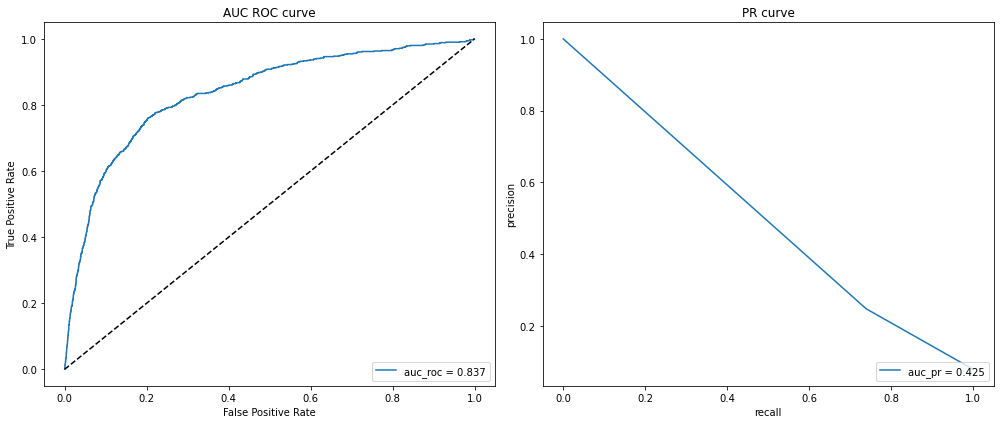

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.371236,0.247871,0.739069,0.801632,0.83657,0.424572,"[[6649, 1590], [185, 524]]"


In [136]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression( C = 0.1,class_weight='balanced', n_jobs = -1, random_state = 100)

lrf = lr.fit(X_train_rfe,y_train)
#lef.predict(X_test_pca.values)[:, 1:]
# Get the Score Metrics and plots
scores = []

print('Test Data Evaluataion Scores')
scores = get_scores(scores, lrf, X_test_rfe)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

#### Get feature wise importance

In [137]:
model_parameter = lr.coef_.tolist()
model_parameter = model_parameter[0]
#model_parameter.append()
model_parameter.insert(0,lr.intercept_[0])
cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
lr_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lr_coef.columns = ['Feature','Coef']

In [144]:
lr_coef = lr_coef.sort_values(by='Coef',ascending=False)
lr_coef.Feature

15                  fb_user_drop
21       roam_og_mou_drop_ovrall
27      total_ic_mou_drop_ovrall
20         onnet_mou_drop_ovrall
16                   vbc_3g_drop
24        std_ic_mou_drop_ovrall
19              arpu_drop_ovrall
22        std_og_mou_drop_ovrall
25        isd_ic_mou_drop_ovrall
18    loc_og_t2c_mou_drop_ovrall
3            std_og_mou_diff_avg
23      total_og_mou_drop_ovrall
14                sachet_3g_drop
7          max_rech_amt_diff_avg
8       total_rech_data_diff_avg
10                ic_others_drop
29         vol_3g_mb_drop_ovrall
28    total_rech_num_drop_ovrall
17     total_rech_amnt_data_drop
26        spl_ic_mou_drop_ovrall
12               monthly_3g_drop
6        total_rech_num_diff_avg
2                  arpu_diff_avg
5          total_ic_mou_diff_avg
9                 og_others_drop
4            spl_ic_mou_diff_avg
1                            aon
13                sachet_2g_drop
11               monthly_2g_drop
0                       constant
Name: Feat

<Figure size 3240x1800 with 0 Axes>

Text(0, 5, '1.291')

Text(0, 5, '0.890')

Text(0, 5, '0.210')

Text(0, 5, '0.170')

Text(0, 5, '0.133')

Text(0, 5, '0.130')

Text(0, 5, '0.061')

Text(0, 5, '0.059')

Text(0, 5, '-0.031')

Text(0, 5, '-0.045')

Text(0, 5, '-0.059')

Text(0, 5, '-0.066')

Text(0, 5, '-0.083')

Text(0, 5, '-0.086')

Text(0, 5, '-0.092')

Text(0.5, 1.0, 'Best fitline coefficients')

Text(0.5, 0, 'Predictor Variable')

Text(0, 0.5, 'Coefficients')

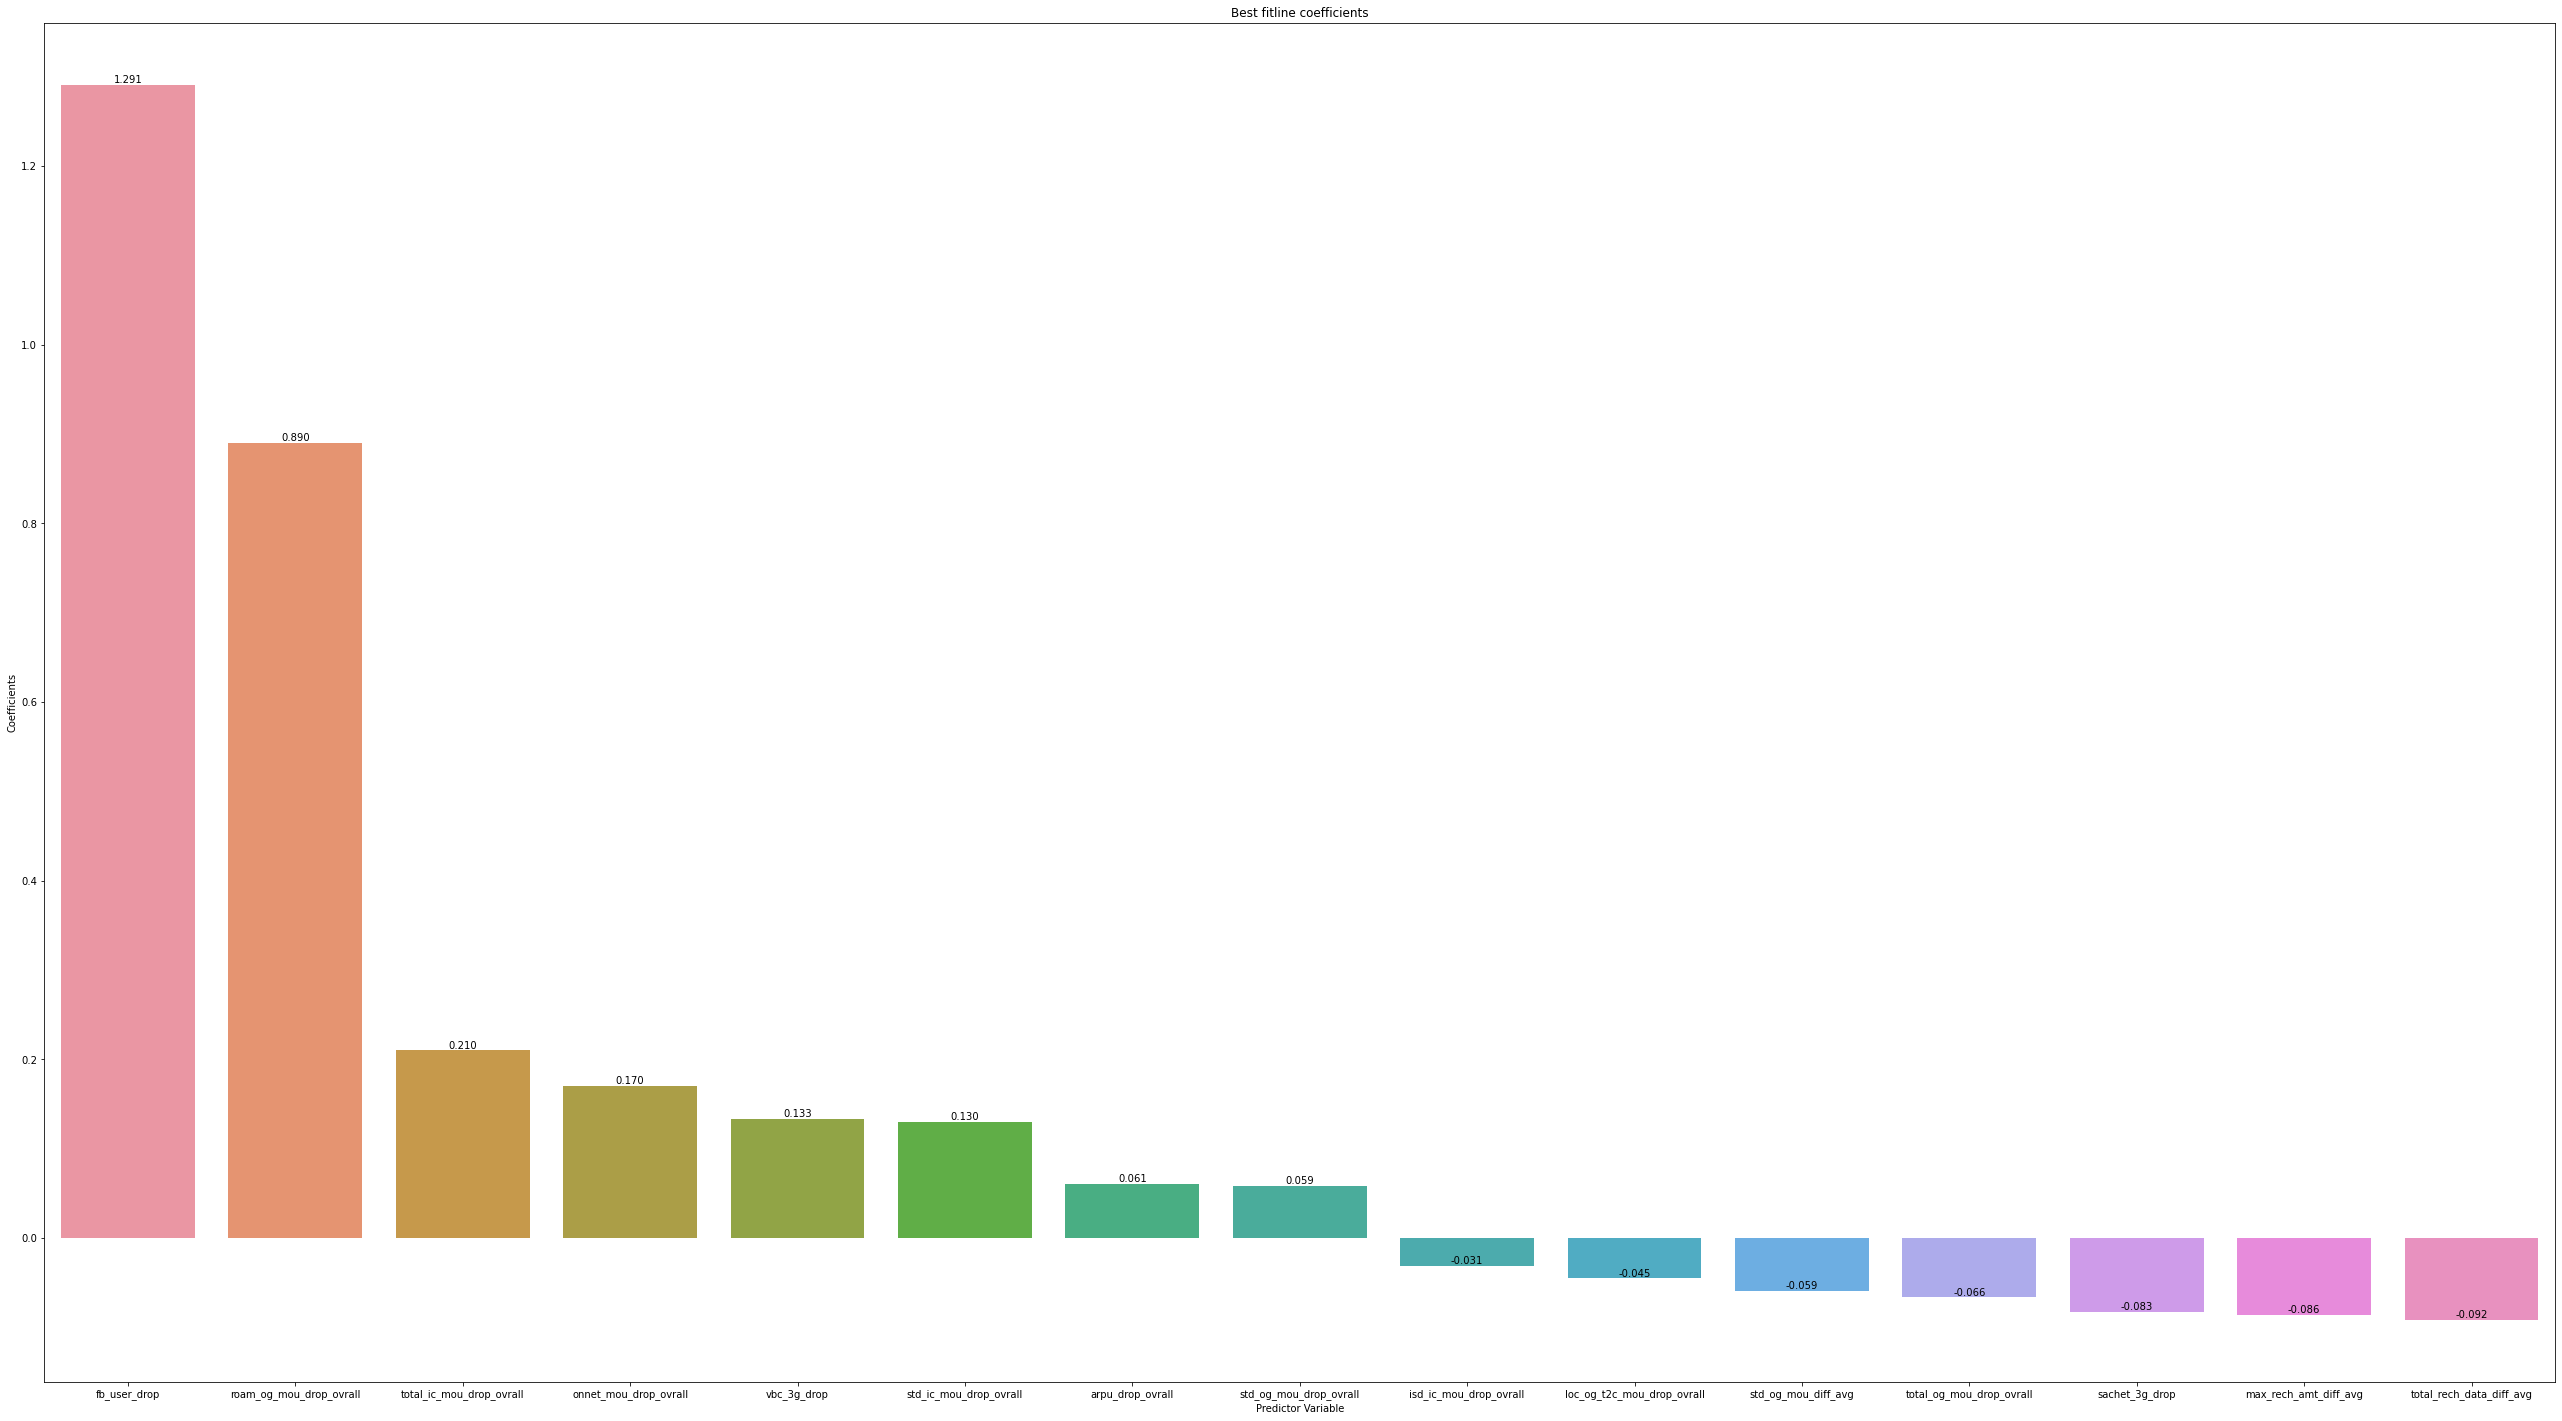

In [139]:
plt.figure(figsize=(45,25))
splot = sns.barplot(x='Feature',y='Coef',data=lr_coef.head(15),orient='v')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,5), 
                   textcoords = 'offset points')
plt.title('Best fitline coefficients')
plt.xlabel('Predictor Variable')
plt.ylabel('Coefficients')
plt.show()

#### Top features affecting the customers to churn
-                  fb_user_drop
-       roam_og_mou_drop_ovrall
-      total_ic_mou_drop_ovrall
-         onnet_mou_drop_ovrall
-                   vbc_3g_drop
-        std_ic_mou_drop_ovrall
-              arpu_drop_ovrall
-        std_og_mou_drop_ovrall
-        isd_ic_mou_drop_ovrall
-    loc_og_t2c_mou_drop_ovrall

#### Business Insights

- Customers who are facebook users and use fb packs tend to churn more, if their facebook recharge packs drop gradually. 

- The telecom company must focus on the roaming rates. They could provide good offers to customer using roaming services. Moreover it is also possible that the roaming network of the telecom company might be weak in some areas due to which customers might be churning.

- Company must also focus on STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

- Volume  Based Cost - is always blind fold to customer. So if there is any slight change in price or speed. Customer dissatisfaction leads to churn.